## Python Final Capstone Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

In [2]:
customers = pd.read_csv("CUSTOMERS.CSV")
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh


In [3]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [4]:
customers.customer_unique_id.nunique()

96096

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
location = pd.read_csv("GEO_LOCATION.CSV")
location.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh


In [7]:
location.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [8]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 742.9+ KB


In [9]:
order_items = pd.read_csv("ORDER_ITEMS.CSV", parse_dates = ['shipping_limit_date'])
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14


In [10]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [11]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [12]:
order_items.loc[order_items.order_id == 'b81ef226f3fe1789b1e8b2acac839d17']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
80985,b81ef226f3fe1789b1e8b2acac839d17,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:00,79.8,19.53


In [13]:
order_payment = pd.read_csv("ORDER_PAYMENTS.CSV")
order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [14]:
order_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [15]:
order_payment.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [16]:
order_payment.payment_type.value_counts()

credit_card    76795
UPI            19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [17]:
order_rating = pd.read_csv("ORDER_REVIEW_RATINGS.CSV", parse_dates = ['review_creation_date', 'review_answer_timestamp'])
order_rating.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:00
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-03-11 03:05:00
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-02-18 14:36:00
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21,2017-04-21 22:02:00
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01,2018-03-02 10:26:00


In [18]:
order_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   review_id                100000 non-null  object        
 1   order_id                 100000 non-null  object        
 2   review_score             100000 non-null  int64         
 3   review_creation_date     100000 non-null  datetime64[ns]
 4   review_answer_timestamp  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


In [19]:
order_rating.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [20]:
orders = pd.read_csv("ORDERS.CSV", parse_dates = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'])
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26


In [21]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [22]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [23]:
orders.loc[orders.order_delivered_customer_date.isnull() == True]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:00,2017-04-13 13:25:00,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:00,2018-06-05 04:31:00,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:00,2018-08-07 06:15:00,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:00,2017-09-03 14:30:00,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:00,2018-01-11 02:32:00,2018-01-11 19:39:00,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:00,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:00,2018-01-09 07:18:00,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:00,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:00,2017-08-28 15:44:00,NaT,NaT,2017-09-15


In [24]:
orders.iloc[[99283,99347]]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:00,NaT,NaT,NaT,2018-10-01
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:00,NaT,NaT,NaT,2018-09-27


In [25]:
## null-values in order_approved_at can be filled by order_purchase_timestamp and null-values in order_delivered_customer_date can be filled by order_estimated_delivery_date 
## and null values in order_delivered_carrier_date can be filled by order_approved_at date.

orders["order_approved_at"].fillna(orders["order_purchase_timestamp"], inplace=True)
orders["order_delivered_carrier_date"].fillna(orders["order_approved_at"], inplace=True)
orders["order_delivered_customer_date"].fillna(orders["order_estimated_delivery_date"], inplace=True)

In [26]:
orders.iloc[[99283,99347]]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:00,2018-08-31 16:13:00,2018-08-31 16:13:00,2018-10-01,2018-10-01
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:00,2018-09-06 18:45:00,2018-09-06 18:45:00,2018-09-27,2018-09-27


In [27]:
orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [28]:
orders['year'] = orders['order_purchase_timestamp'].dt.year
orders['month'] = orders['order_purchase_timestamp'].dt.month
orders['month_year'] = orders['order_purchase_timestamp'].dt.strftime("%m%Y")

In [29]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,month_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2017,10,102017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,2018,7,072018
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,2018,8,082018
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15,2017,11,112017
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26,2018,2,022018


In [30]:
products = pd.read_csv("PRODUCTS.CSV")
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [31]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [32]:
products.isna().sum()

product_id                      0
product_category_name         623
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [33]:
## missing value treatment : 

products['product_category_name'].fillna(products['product_category_name'].mode()[0],inplace=True)
products['product_name_lenght'].fillna(products['product_name_lenght'].median(),inplace=True)
products['product_description_lenght'].fillna(products['product_description_lenght'].median(),inplace=True)
products['product_photos_qty'].fillna(products['product_photos_qty'].mode()[0],inplace=True)
products['product_weight_g'].fillna(products['product_weight_g'].median(),inplace=True)
products['product_length_cm'].fillna(products['product_length_cm'].median(),inplace=True)
products['product_height_cm'].fillna(products['product_height_cm'].median(),inplace=True)
products['product_width_cm'].fillna(products['product_width_cm'].median(),inplace=True)

In [34]:
products.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [35]:
sellers = pd.read_csv("SELLERS.CSV")
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh


In [36]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3038 non-null   object
 3   seller_state            3038 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [37]:
sellers.isna().sum()

seller_id                  0
seller_zip_code_prefix     0
seller_city               57
seller_state              57
dtype: int64

In [38]:
## missing value treatment : 

sellers['seller_city'].fillna(sellers['seller_city'].mode()[0],inplace=True)
sellers['seller_state'].fillna(sellers['seller_state'].mode()[0],inplace=True)

In [39]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [66]:
df = pd.merge(orders, order_items, on='order_id')
df = pd.merge(df, products, on='product_id')
df = pd.merge(df, sellers, on='seller_id')
df = pd.merge(df, customers, on='customer_id')
df = pd.merge(df, order_payment, on='order_id')
df = pd.merge(df, order_rating, on='order_id')
df = pd.merge(df, location, left_on = 'customer_zip_code_prefix',right_on='geolocation_zip_code_prefix')
df = pd.merge(df, location, left_on = 'seller_zip_code_prefix',right_on='geolocation_zip_code_prefix')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117734 entries, 0 to 117733
Data columns (total 50 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117734 non-null  object        
 1   customer_id                    117734 non-null  object        
 2   order_status                   117734 non-null  object        
 3   order_purchase_timestamp       117734 non-null  datetime64[ns]
 4   order_approved_at              117734 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117734 non-null  datetime64[ns]
 6   order_delivered_customer_date  117734 non-null  datetime64[ns]
 7   order_estimated_delivery_date  117734 non-null  datetime64[ns]
 8   year                           117734 non-null  int64         
 9   month                          117734 non-null  int64         
 10  month_year                     117734 non-null  period[M]     
 11  

In [68]:
df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
year                             0
month                            0
month_year                       0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
customer_unique_id  

In [69]:
df.head().T

,0,1,2,3,4
order_id,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,128e10d95713541c87cd1a2e48201934,0e7e841ddf8f8f2de2bad69267ecfbcf
customer_id,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,a20e8105f23924cd00833fd87daa0831,26c7ac168e1433912a51b924fbd34d34
order_status,delivered,delivered,delivered,delivered,delivered
order_purchase_timestamp,2017-10-02 10:56:00,2017-10-02 10:56:00,2017-10-02 10:56:00,2017-08-15 18:29:00,2017-08-02 18:24:00
order_approved_at,2017-10-02 11:07:00,2017-10-02 11:07:00,2017-10-02 11:07:00,2017-08-15 20:05:00,2017-08-02 18:43:00
order_delivered_carrier_date,2017-10-04 19:55:00,2017-10-04 19:55:00,2017-10-04 19:55:00,2017-08-17 15:28:00,2017-08-04 17:35:00
order_delivered_customer_date,2017-10-10 21:25:00,2017-10-10 21:25:00,2017-10-10 21:25:00,2017-08-18 14:44:00,2017-08-07 18:30:00
order_estimated_delivery_date,2017-10-18 00:00:00,2017-10-18 00:00:00,2017-10-18 00:00:00,2017-08-28 00:00:00,2017-08-15 00:00:00
year,2017,2017,2017,2017,2017
month,10,10,10,8,8


In [70]:
df.rename(columns = {'geolocation_zip_code_prefix_x' : 'geolocation_zip_code_prefix_cust', 
                             'geolocation_lat_x' : 'geolocation_lat_cust',
                           'geolocation_lng_x': 'geolocation_lng_cust',
                            'geolocation_city_x': 'geolocation_city_cust',
                            'geolocation_state_x': 'geolocation_state_cust',
                            'geolocation_zip_code_prefix_y': 'geolocation_zip_code_prefix_seller',
                            'geolocation_lat_y': 'geolocation_lat_seller',
                            'geolocation_lng_y': 'geolocation_lng_seller',
                            'geolocation_city_y': 'geolocation_city_seller',
                            'geolocation_state_y': 'geolocation_state_seller'}, inplace = True)

In [71]:
df.head().T

,0,1,2,3,4
order_id,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,128e10d95713541c87cd1a2e48201934,0e7e841ddf8f8f2de2bad69267ecfbcf
customer_id,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,a20e8105f23924cd00833fd87daa0831,26c7ac168e1433912a51b924fbd34d34
order_status,delivered,delivered,delivered,delivered,delivered
order_purchase_timestamp,2017-10-02 10:56:00,2017-10-02 10:56:00,2017-10-02 10:56:00,2017-08-15 18:29:00,2017-08-02 18:24:00
order_approved_at,2017-10-02 11:07:00,2017-10-02 11:07:00,2017-10-02 11:07:00,2017-08-15 20:05:00,2017-08-02 18:43:00
order_delivered_carrier_date,2017-10-04 19:55:00,2017-10-04 19:55:00,2017-10-04 19:55:00,2017-08-17 15:28:00,2017-08-04 17:35:00
order_delivered_customer_date,2017-10-10 21:25:00,2017-10-10 21:25:00,2017-10-10 21:25:00,2017-08-18 14:44:00,2017-08-07 18:30:00
order_estimated_delivery_date,2017-10-18 00:00:00,2017-10-18 00:00:00,2017-10-18 00:00:00,2017-08-28 00:00:00,2017-08-15 00:00:00
year,2017,2017,2017,2017,2017
month,10,10,10,8,8


### Checking duplicate values 

In [72]:
df.duplicated().sum()

0

### Five point summary of countinuous variables

In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,117734.0,2017.537347,0.505205,2016.000000,2017.000000,2018.000000,2018.000000,2018.000000
month,117734.0,6.025880,3.231419,1.000000,3.000000,6.000000,8.000000,12.000000
order_item_id,117734.0,1.196681,0.700270,1.000000,1.000000,1.000000,1.000000,21.000000
price,117734.0,120.683500,184.316505,0.850000,39.900000,74.900000,134.900000,6735.000000
freight_value,117734.0,20.025875,15.850974,0.000000,13.070000,16.280000,21.180000,409.680000
product_name_lenght,117734.0,48.788031,9.968304,5.000000,43.000000,51.000000,57.000000,76.000000
product_description_lenght,117734.0,783.249724,648.871633,4.000000,348.000000,595.000000,976.000000,3992.000000
product_photos_qty,117734.0,2.182785,1.706513,1.000000,1.000000,1.000000,3.000000,20.000000
product_weight_g,117734.0,2110.636367,3781.610723,0.000000,300.000000,700.000000,1800.000000,40425.000000
product_length_cm,117734.0,30.257453,16.180568,7.000000,18.000000,25.000000,38.000000,105.000000


In [74]:
df.shape

(117734, 50)

## Total payment methods

In [75]:
order_payment.payment_type.unique()

array(['credit_card', 'UPI', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

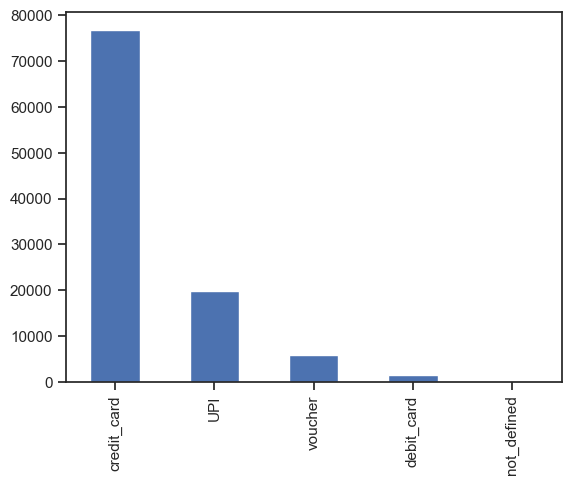

In [76]:
order_payment.payment_type.value_counts().plot(kind = 'bar');

In [77]:
order_payment.payment_type.value_counts()

credit_card    76795
UPI            19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

## 1. Perform Detailed exploratory analysis

### a. Calculate high-level metrics

In [78]:
total_revenue = df['price'].sum() + df['freight_value'].sum()
total_quantity = df['order_item_id'].sum()
total_products = df['product_id'].nunique()
total_categories = df['product_category_name'].nunique()
total_sellers = df['seller_id'].nunique()
total_locations = df['geolocation_state_cust'].nunique()
total_payment_methods = df['payment_type'].nunique()

In [79]:
print("Total revenue is : ", total_revenue)
print("Total quantity is : ", total_quantity)
print("Total products are : ", total_products)
print("Total categories are : ", total_categories)
print("Total sellers are : ", total_sellers)
print("Total locations are : ", total_locations)
print("Total payments methods are : ", total_payment_methods)

Total revenue is :  16566277.559999999
Total quantity is :  140890
Total products are :  32842
Total categories are :  71
Total sellers are :  3088
Total locations are :  20
Total payments methods are :  4


### b. Understanding how many new customers acquired every month

In [80]:
# step 1
min_trans_month = df.groupby(['customer_unique_id', 'year', 'month'])['order_purchase_timestamp'].min().reset_index()

# step 2
min_trans = df.groupby('customer_unique_id')['order_purchase_timestamp'].min().reset_index()

# merge step 1 and 2
merged = pd.merge(min_trans_month, min_trans, on='customer_unique_id', suffixes=('_month', '_overall'))

# create user_type column
merged['user_type'] = np.where(merged['order_purchase_timestamp_month'] > merged['order_purchase_timestamp_overall'], 'EXISTING', 'NEW')

# merge back to original df
df = pd.merge(df, merged[['customer_unique_id', 'year', 'month', 'user_type']], on=['customer_unique_id', 'year', 'month'])


In [81]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,...,geolocation_lat_cust,geolocation_lng_cust,geolocation_city_cust,geolocation_state_cust,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller,user_type
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2017,10,...,-23.574809,-46.587471,Akkarampalle,Andhra Pradesh,9350,-23.680114,-46.452454,Chhuikhadan,Chhattisgarh,EXISTING
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2017,10,...,-23.574809,-46.587471,Akkarampalle,Andhra Pradesh,9350,-23.680114,-46.452454,Chhuikhadan,Chhattisgarh,EXISTING
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2017,10,...,-23.574809,-46.587471,Akkarampalle,Andhra Pradesh,9350,-23.680114,-46.452454,Chhuikhadan,Chhattisgarh,EXISTING
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:00,2017-08-15 20:05:00,2017-08-17 15:28:00,2017-08-18 14:44:00,2017-08-28,2017,8,...,-23.565578,-46.534603,Akkarampalle,Andhra Pradesh,9350,-23.680114,-46.452454,Chhuikhadan,Chhattisgarh,NEW
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:00,2017-08-02 18:43:00,2017-08-04 17:35:00,2017-08-07 18:30:00,2017-08-15,2017,8,...,-23.543295,-46.630743,Akkarampalle,Andhra Pradesh,9350,-23.680114,-46.452454,Chhuikhadan,Chhattisgarh,NEW


In [82]:
pd.crosstab(index = df.user_type, columns = df.month_year, values = df.user_type , aggfunc = 'count')

month_year,2016-09,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,...,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09
user_type,,,,,,,,,,,,,,,,,,,,,
EXISTING,NaN,NaN,NaN,1.0,3.0,7.0,28.0,30.0,59.0,76.0,...,152.0,167.0,164.0,219.0,232.0,233.0,264.0,206.0,209.0,1.0
NEW,3.0,386.0,1.0,1022.0,2069.0,3181.0,2821.0,4393.0,3735.0,4784.0,...,6400.0,8397.0,7818.0,8337.0,8000.0,7957.0,7100.0,7125.0,7225.0,NaN


## Monthly customer aquisition trend

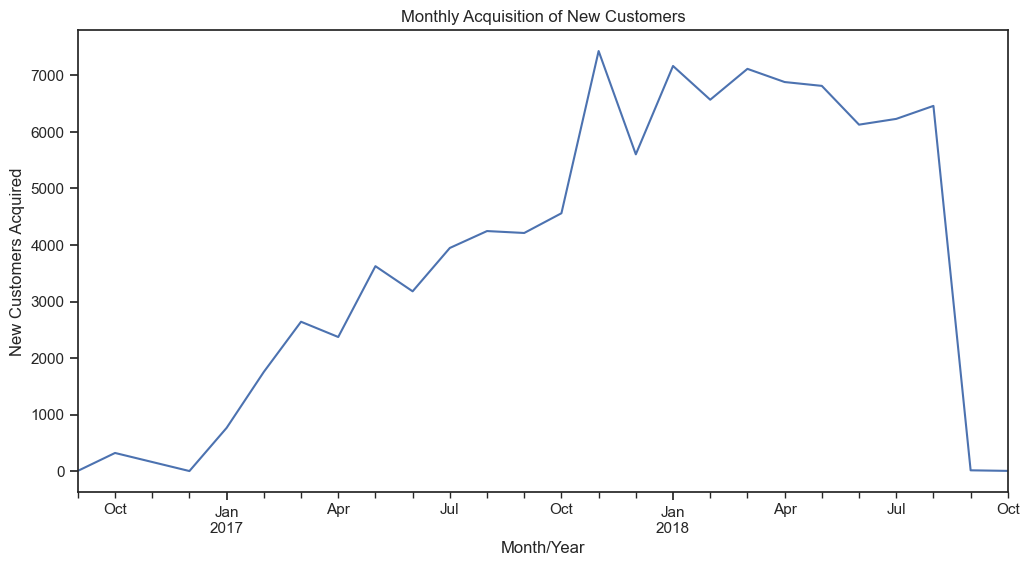

In [83]:
# Step 1: Extract month and year from order_purchase_timestamp
orders['month_year'] = orders['order_purchase_timestamp'].dt.to_period('M')

# Step 2: Merge orders and customers dataframes
df1 = pd.merge(orders[['customer_id', 'month_year']], customers[['customer_id', 'customer_unique_id']], on = 'customer_id', how = 'left')

# Step 3: Group by month_year and count unique customers
new_customers_per_month = df1.groupby('month_year')['customer_unique_id'].nunique()

# Step 4: Plot the result
new_customers_per_month.plot(kind = 'line', figsize = (12,6), xlabel = 'Month/Year', ylabel = 'New Customers Acquired', title = 'Monthly Acquisition of New Customers')
plt.show()

## c. Understand the retention of customers on month on month basis


In [88]:
df['month_year'] = df['order_purchase_timestamp'].dt.strftime("%Y%m")

In [89]:
user_revenue = df.groupby(["customer_unique_id", 'month_year'])[['payment_value']].sum().reset_index()

In [90]:
retention = pd.crosstab(user_revenue.customer_unique_id, user_revenue.month_year).reset_index()

In [91]:
retention.head()

month_year,customer_unique_id,201609,201610,201612,201701,201702,201703,201704,201705,201706,...,201712,201801,201802,201803,201804,201805,201806,201807,201808,201809
0,0000366f3b9a7992bf8c76cfdf3221e2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0000f46a3911fa3c0805444483337064,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0000f6ccb0745a6a4b88665a16c9f078,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0004aac84e0df4da2b147fca70cf8255,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
months = retention.columns[2:]
months

Index(['201610', '201612', '201701', '201702', '201703', '201704', '201705',
       '201706', '201707', '201708', '201709', '201710', '201711', '201712',
       '201801', '201802', '201803', '201804', '201805', '201806', '201807',
       '201808', '201809'],
      dtype='object', name='month_year')

In [93]:
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['month_year'] = int(selected_month)
    retention_data['TotalUserCount'] = retention[selected_month].sum()
    retention_data['RetainedUserCount'] = retention[(retention[selected_month]>0) & (retention[prev_month]>0)][prev_month].sum()
    retention_array.append(retention_data) 

In [94]:
retention_array

[{'month_year': 201612, 'TotalUserCount': 1, 'RetainedUserCount': 0},
 {'month_year': 201701, 'TotalUserCount': 755, 'RetainedUserCount': 1},
 {'month_year': 201702, 'TotalUserCount': 1707, 'RetainedUserCount': 3},
 {'month_year': 201703, 'TotalUserCount': 2590, 'RetainedUserCount': 4},
 {'month_year': 201704, 'TotalUserCount': 2345, 'RetainedUserCount': 13},
 {'month_year': 201705, 'TotalUserCount': 3571, 'RetainedUserCount': 13},
 {'month_year': 201706, 'TotalUserCount': 3133, 'RetainedUserCount': 17},
 {'month_year': 201707, 'TotalUserCount': 3874, 'RetainedUserCount': 17},
 {'month_year': 201708, 'TotalUserCount': 4189, 'RetainedUserCount': 22},
 {'month_year': 201709, 'TotalUserCount': 4144, 'RetainedUserCount': 32},
 {'month_year': 201710, 'TotalUserCount': 4472, 'RetainedUserCount': 32},
 {'month_year': 201711, 'TotalUserCount': 7304, 'RetainedUserCount': 36},
 {'month_year': 201712, 'TotalUserCount': 5527, 'RetainedUserCount': 40},
 {'month_year': 201801, 'TotalUserCount': 7089

In [95]:
retention_matrix = pd.DataFrame(retention_array)
retention_matrix['RetentionRate'] = retention_matrix['RetainedUserCount']/retention_matrix['TotalUserCount'] * 100 
retention_matrix.head()

,month_year,TotalUserCount,RetainedUserCount,RetentionRate
0,201612,1,0,0.000000
1,201701,755,1,0.132450
2,201702,1707,3,0.175747
3,201703,2590,4,0.154440
4,201704,2345,13,0.554371


In [96]:
retention_matrix['month_year'] = pd.to_datetime(retention_matrix['month_year'], format = "%Y%m")

In [97]:
retention_matrix['month_year'] = retention_matrix['month_year'].dt.strftime("%Y-%m")

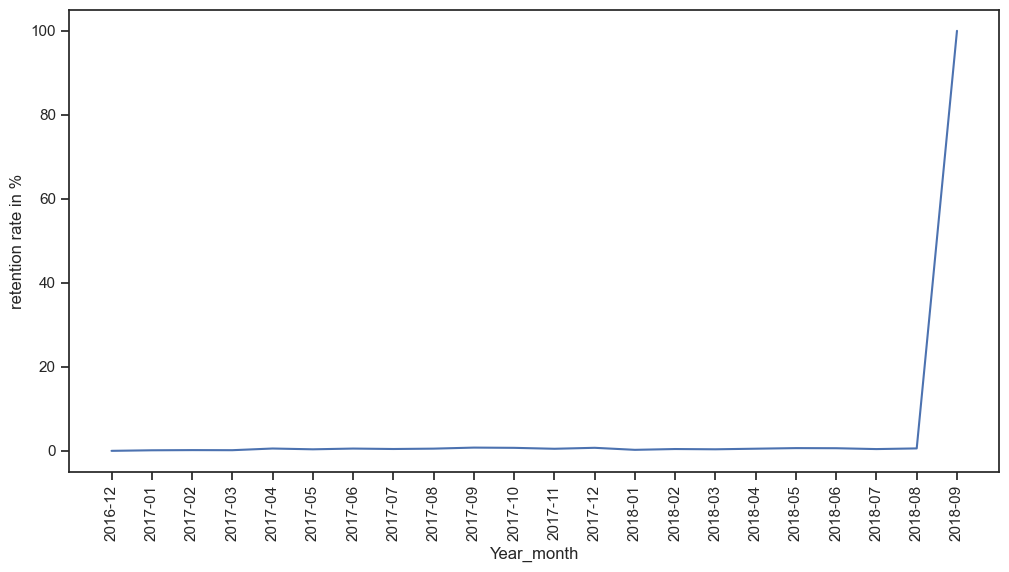

In [98]:
plt.figure(figsize = (12,6))
plt.plot(retention_matrix.month_year, retention_matrix.RetentionRate)
plt.xticks(rotation = 90)
plt.xlabel("Year_month")
plt.ylabel("retention rate in %")
plt.show()

## Customer retention analysis using "Cohort"

In [99]:
data = pd.merge(orders, customers, on = 'customer_id', how = 'inner')
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,month_year,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2017,10,2017-10,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,2018,7,2018-07,af07308b275d755c9edb36a90c618231,47813,Pandariya,Chhattisgarh
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,2018,8,2018-08,3a653a41f6f9fc3d2a113cf8398680e8,75265,Dhamdha,Chhattisgarh
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15,2017,11,2017-11,7c142cf63193a1473d2e66489a9ae977,59296,Kartarpur,Punjab
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26,2018,2,2018-02,72632f0f9dd73dfee390c9b22eb56dd6,9195,Bheemavaram,Andhra Pradesh


In [100]:
import datetime as dt
def get_month(x):
    return dt.datetime(x.year, x.month, 1)
data['order_purchase_month'] = orders['order_purchase_timestamp'].apply(get_month)
data.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,month_year,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_purchase_month
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:00,2017-03-09 09:54:00,2017-03-10 11:18:00,2017-03-17 15:08:00,2017-03-28,2017,3,2017-03,6359f309b166b0196dbf7ad2ac62bb5a,12209,Bobbili,Andhra Pradesh,2017-03-01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:00,2018-02-06 13:10:00,2018-02-07 23:22:00,2018-02-28 17:37:00,2018-03-02,2018,2,2018-02,da62f9e57a76d978d02ab5362c509660,11722,Mahendragarh,Haryana,2018-02-01
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:00,2017-08-27 15:04:00,2017-08-28 20:52:00,2017-09-21 11:24:00,2017-09-27,2017,8,2017-08,737520a9aad80b3fbbdad19b66b37b30,45920,Bidasar,Rajasthan,2017-08-01
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:00,2018-01-08 21:36:00,2018-01-12 15:35:00,2018-01-25 23:32:00,2018-02-15,2018,1,2018-01,5097a5312c8b157bb7be58ae360ef43c,28685,Banaur,Punjab,2018-01-01
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:00,2018-03-09 11:20:00,2018-03-09 22:11:00,2018-03-16 13:08:00,2018-04-03,2018,3,2018-03,60350aa974b26ff12caad89e55993bd6,83750,Longowal,Punjab,2018-03-01


In [101]:
data['cohort_month'] = data.groupby('customer_unique_id')['order_purchase_month'].transform('min')
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,month_year,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_purchase_month,cohort_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2017,10,2017-10,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,2017-10-01,2017-09-01
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,2018,7,2018-07,af07308b275d755c9edb36a90c618231,47813,Pandariya,Chhattisgarh,2018-07-01,2018-07-01
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,2018,8,2018-08,3a653a41f6f9fc3d2a113cf8398680e8,75265,Dhamdha,Chhattisgarh,2018-08-01,2018-08-01
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15,2017,11,2017-11,7c142cf63193a1473d2e66489a9ae977,59296,Kartarpur,Punjab,2017-11-01,2017-11-01
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26,2018,2,2018-02,72632f0f9dd73dfee390c9b22eb56dd6,9195,Bheemavaram,Andhra Pradesh,2018-02-01,2018-02-01


In [102]:
def get_date_elements(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year

In [103]:
data_day, data_month, data_year = get_date_elements(data, 'order_purchase_month')
cohort_day, cohort_month, cohort_year = get_date_elements(data, 'cohort_month')

In [104]:
year_diff = data_year - cohort_year
month_diff = data_month - cohort_month
data['cohort_index'] = year_diff * 12 + month_diff + 1
data.tail(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,month_year,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_purchase_month,cohort_month,cohort_index
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:00,2017-03-09 09:54:00,2017-03-10 11:18:00,2017-03-17 15:08:00,2017-03-28,2017,3,2017-03,6359f309b166b0196dbf7ad2ac62bb5a,12209,Bobbili,Andhra Pradesh,2017-03-01,2017-03-01,1
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:00,2018-02-06 13:10:00,2018-02-07 23:22:00,2018-02-28 17:37:00,2018-03-02,2018,2,2018-02,da62f9e57a76d978d02ab5362c509660,11722,Mahendragarh,Haryana,2018-02-01,2018-02-01,1
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:00,2017-08-27 15:04:00,2017-08-28 20:52:00,2017-09-21 11:24:00,2017-09-27,2017,8,2017-08,737520a9aad80b3fbbdad19b66b37b30,45920,Bidasar,Rajasthan,2017-08-01,2017-08-01,1
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:00,2018-01-08 21:36:00,2018-01-12 15:35:00,2018-01-25 23:32:00,2018-02-15,2018,1,2018-01,5097a5312c8b157bb7be58ae360ef43c,28685,Banaur,Punjab,2018-01-01,2018-01-01,1
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:00,2018-03-09 11:20:00,2018-03-09 22:11:00,2018-03-16 13:08:00,2018-04-03,2018,3,2018-03,60350aa974b26ff12caad89e55993bd6,83750,Longowal,Punjab,2018-03-01,2018-03-01,1


In [105]:
cohort_data = data.groupby(['cohort_month', 'cohort_index'])['customer_unique_id'].apply(pd.Series.nunique).reset_index()
cohort_data

,cohort_month,cohort_index,customer_unique_id
0,2016-09-01,1,4
1,2016-10-01,1,321
2,2016-10-01,7,1
3,2016-10-01,10,1
4,2016-10-01,12,1
...,...,...,...
220,2018-08-01,1,6271
221,2018-08-01,2,7
222,2018-08-01,3,2
223,2018-09-01,1,5


In [106]:
cohort_table = cohort_data.pivot(index = 'cohort_month', columns = 'cohort_index', values = 'customer_unique_id')

In [107]:
cohort_table.index = cohort_table.index.strftime("%B %Y")

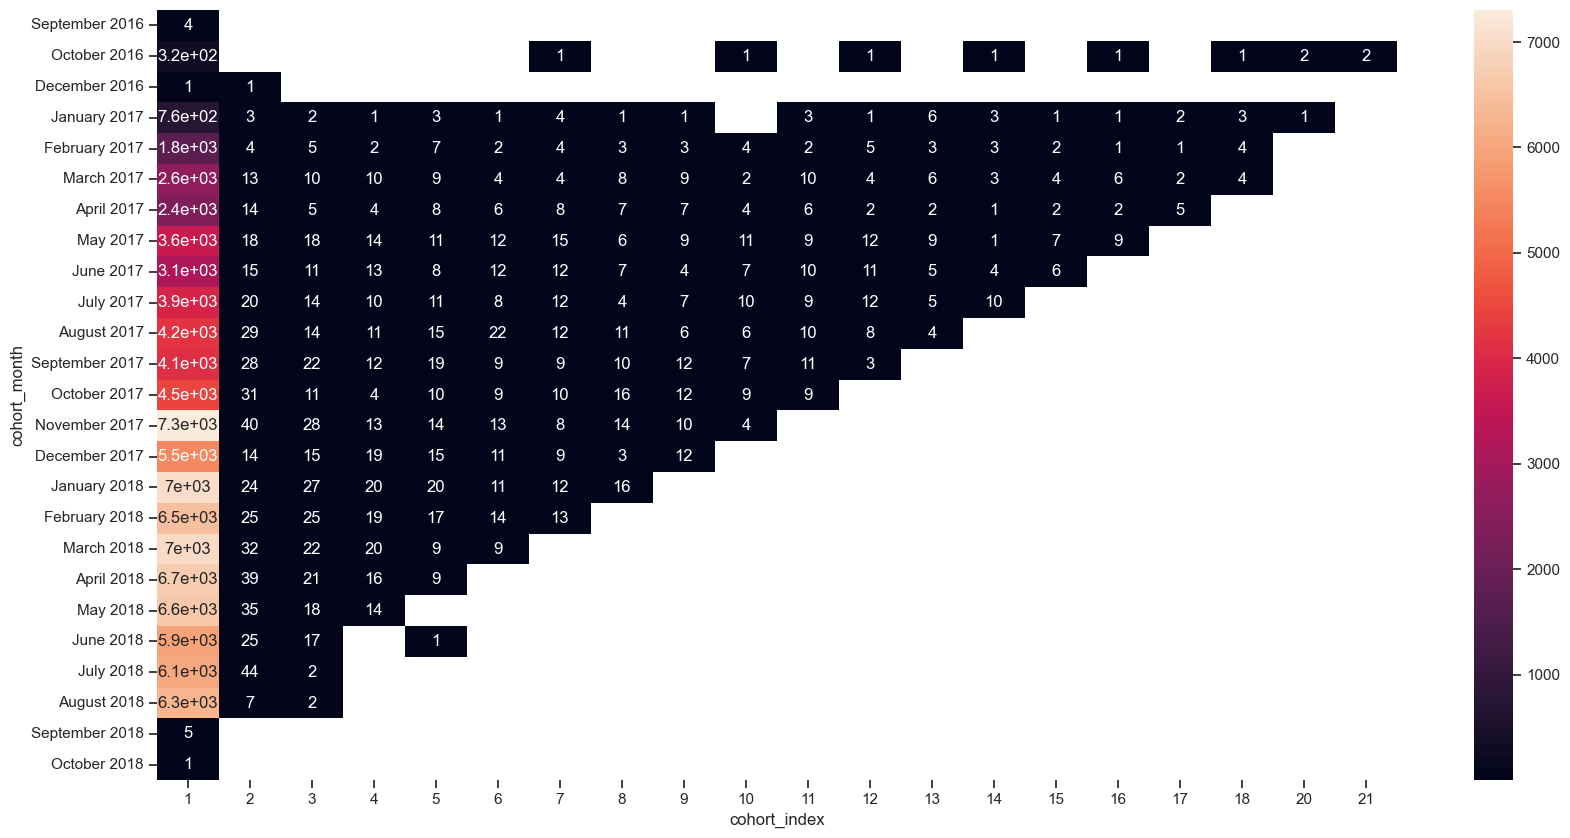

In [108]:
plt.figure(figsize = (20,10))
sns.heatmap(cohort_table, annot = True)
plt.show()

In [109]:
new_cohort_table = cohort_table.divide(cohort_table.iloc[ :, 0], axis = 0)

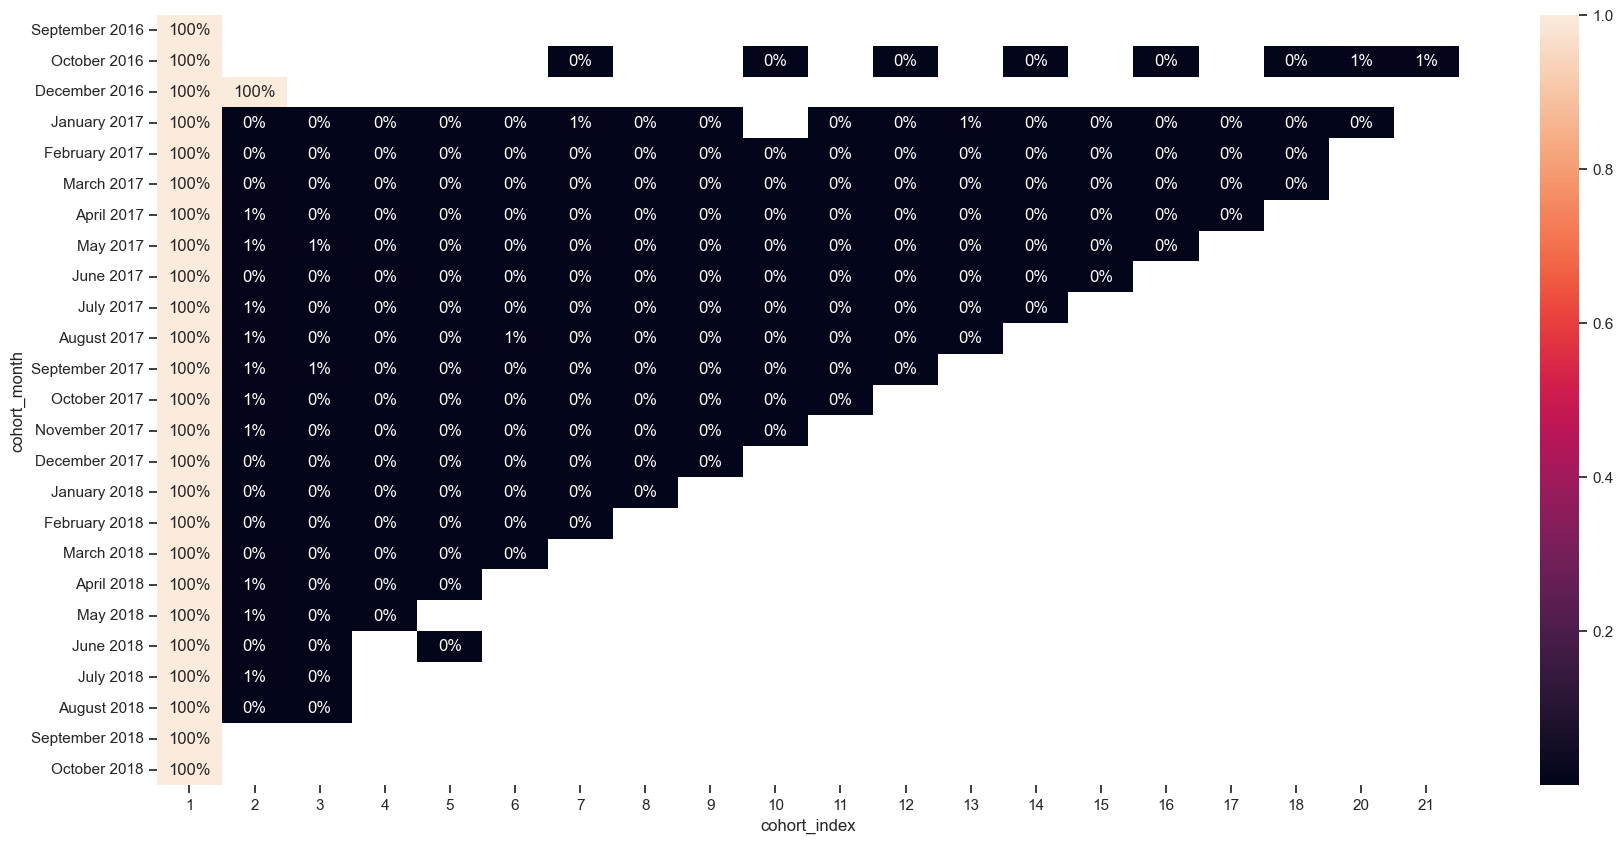

In [110]:
plt.figure(figsize = (21,10))
sns.heatmap(new_cohort_table, annot = True, fmt = ".0%")
plt.show()

#### The above cohort table heat map is showing only 0% and 1%, it could mean that the retention rate of customers over time is very low. A retention rate of 0% would indicate that none of the customers returned after their initial purchase, while a retention rate of 1% would mean that only a very small fraction of customers made a repeat purchase. This could suggest that there may be issues with the product, pricing, customer service, or marketing strategy that need to be addressed in order to improve customer retention and loyalty. It is important to investigate further to understand the reasons behind such low retention rates and take appropriate actions to address them.

## d. How the revenues from existing/new customers on month on month basis

In [111]:
df['month_year'] = df['order_purchase_timestamp'].dt.to_period("M")

In [112]:
pd.crosstab(index = df.month_year, columns = df.user_type, values = df.payment_value, aggfunc = 'sum')

user_type,EXISTING,NEW
month_year,,
2016-09,NaN,347.52
2016-10,NaN,74773.54
2016-12,NaN,19.62
2017-01,19.62,189550.40
2017-02,170.83,346043.48
2017-03,700.34,527821.17
2017-04,3396.57,502139.41
2017-05,6606.35,720741.47
2017-06,7499.31,591705.49


In [113]:
revenue = pd.crosstab(index = df.month_year, columns = df.user_type, values = df.payment_value, aggfunc = 'sum')
revenue.EXISTING.sum()

410786.58999999997

In [114]:
revenue.NEW.sum()

19910527.1

In [115]:
revenue.EXISTING.sum() + revenue.NEW.sum()

20321313.69

In [116]:
df.payment_value.sum()

20321313.69

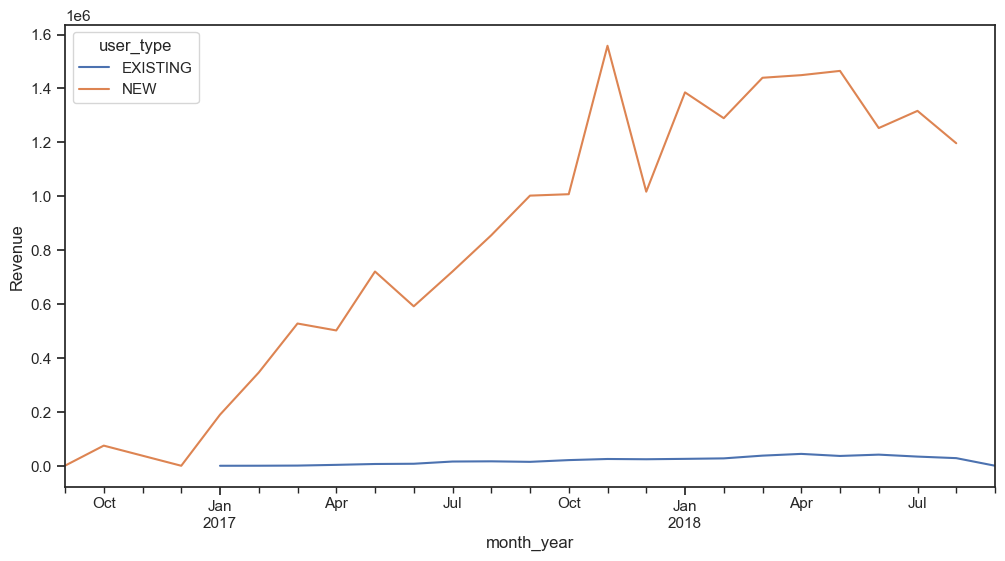

In [117]:
revenue.plot(figsize = (12,6))
plt.ylabel("Revenue")
plt.show()


### It can be concluded from the above bar chart that every month, the total revenue for new customers is always more than that of exixting customers.

### e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

## Sales

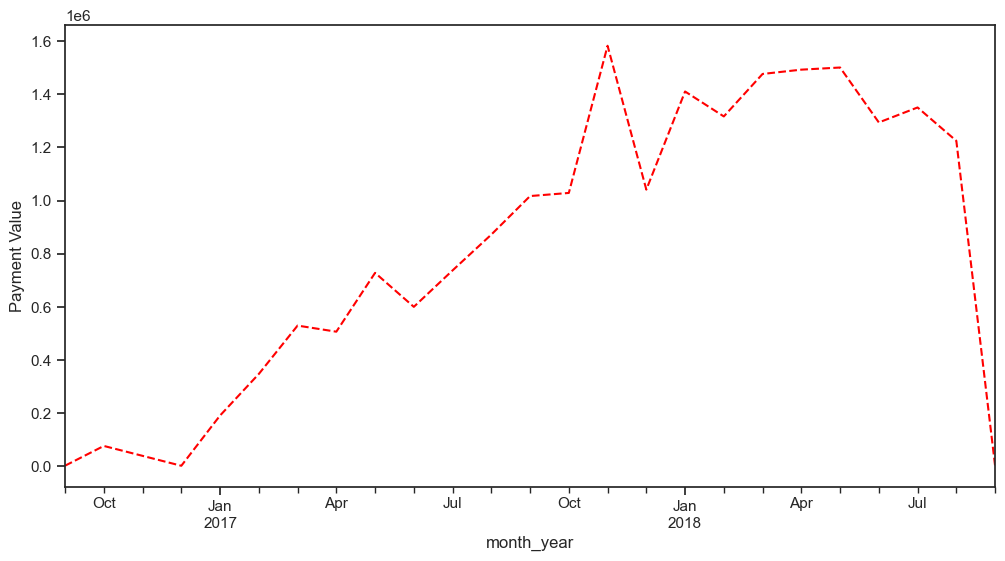

In [125]:
sales = df.groupby("month_year")[['payment_value']].sum().plot(kind = 'line', color = 'red', linestyle ='--',figsize = (12,6), legend = None)
plt.ylabel("Payment Value")
plt.show()


### Observation(s):
#### from the above plot we can observe that the sales is increasing from 2016-09 to 2017-11(highest) and then start decreasing .

## Quantity by category

In [126]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


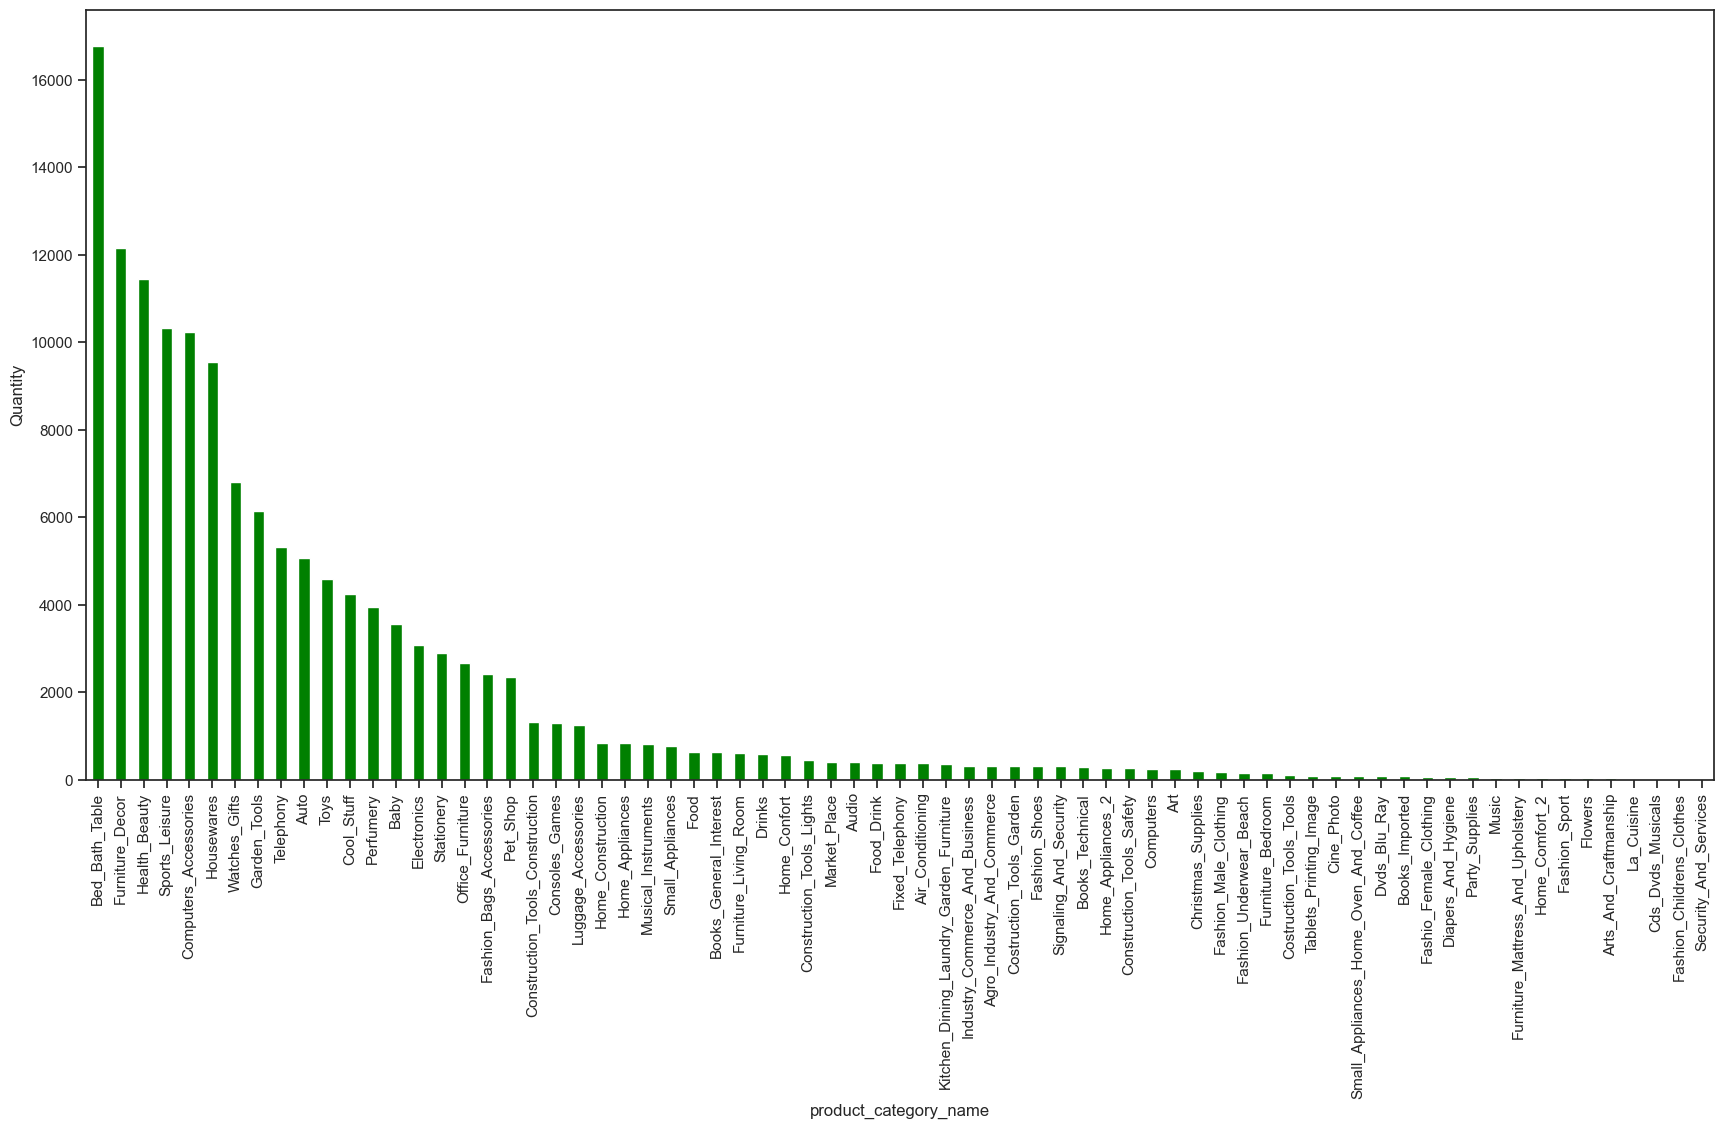

In [138]:
qty_cat = df.groupby("product_category_name")[['order_item_id']].sum().sort_values(by = 'order_item_id', ascending = False)
qty_cat.plot(kind = 'bar', figsize = (21,10), legend = None, color = 'green')
plt.ylabel("Quantity")
plt.show()

## Quantity by Location

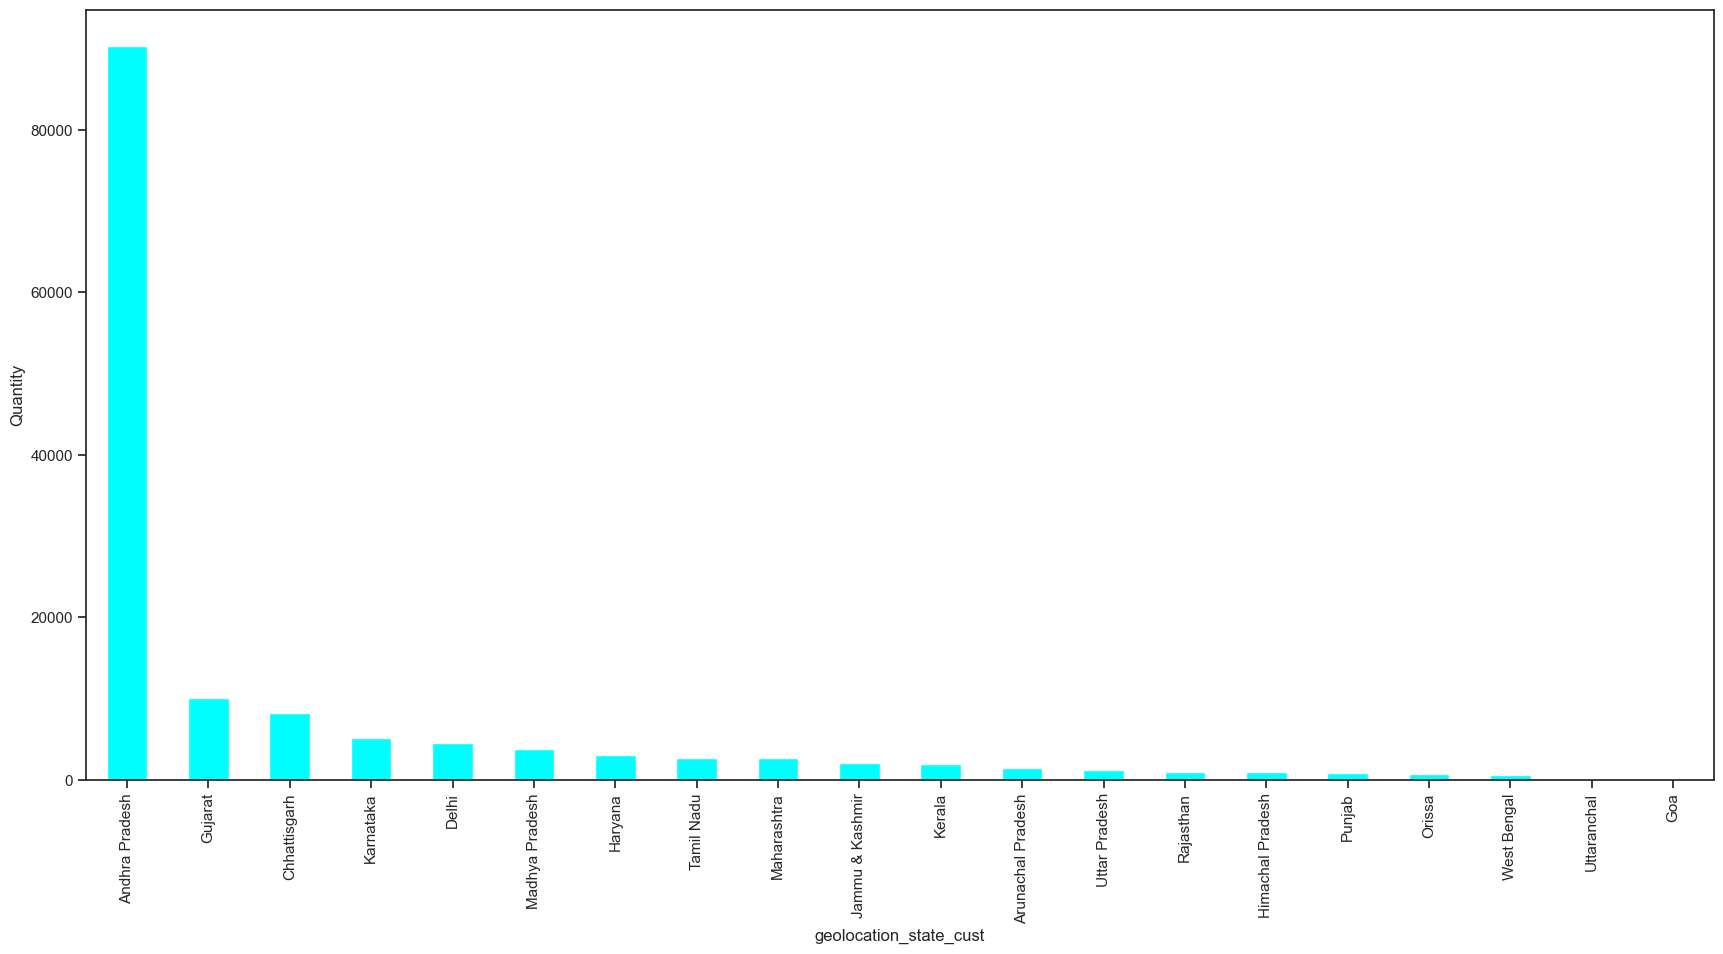

In [139]:
qty_loc = df.groupby(['geolocation_state_cust'])[['order_item_id']].sum().sort_values(by = 'order_item_id', ascending = False)
qty_loc.plot(kind = 'bar', figsize = (21,10), legend = None, color = 'aqua')
plt.ylabel("Quantity")
plt.show()

## Quantity by Month

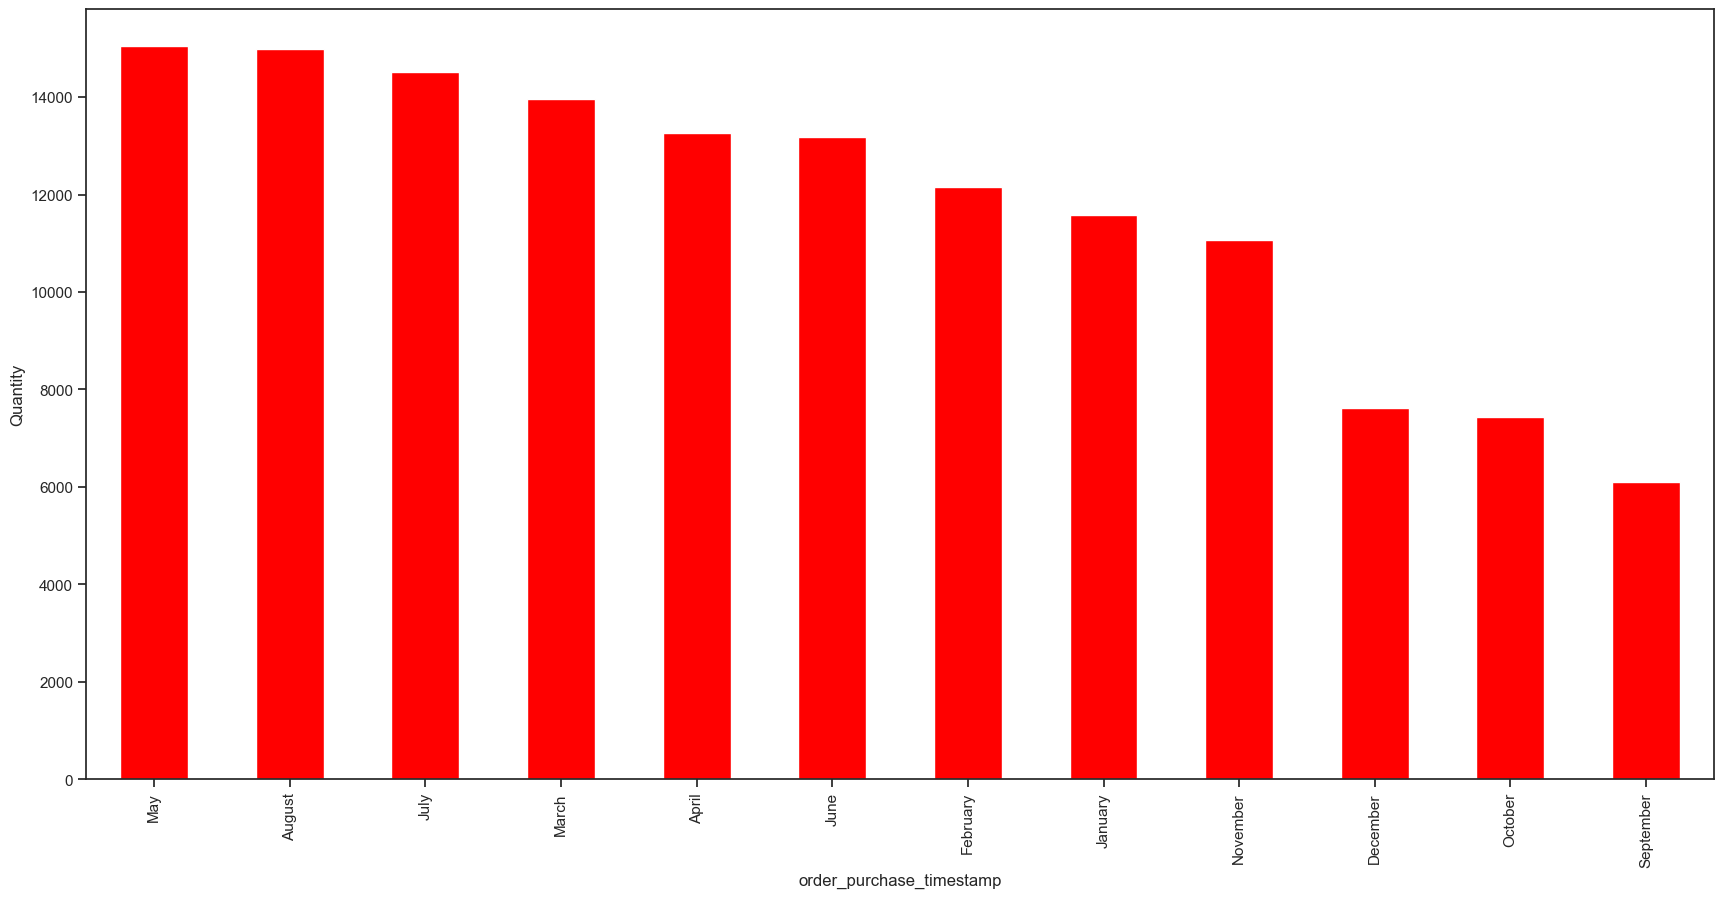

In [140]:
qty_month = df.groupby(df.order_purchase_timestamp.dt.month_name())[['order_item_id']].sum().sort_values(by = 'order_item_id', ascending = False)
qty_month.plot(kind = 'bar', figsize = (21,10),legend = None, color = 'red')
plt.ylabel("Quantity")
plt.show()

## Quantity by year

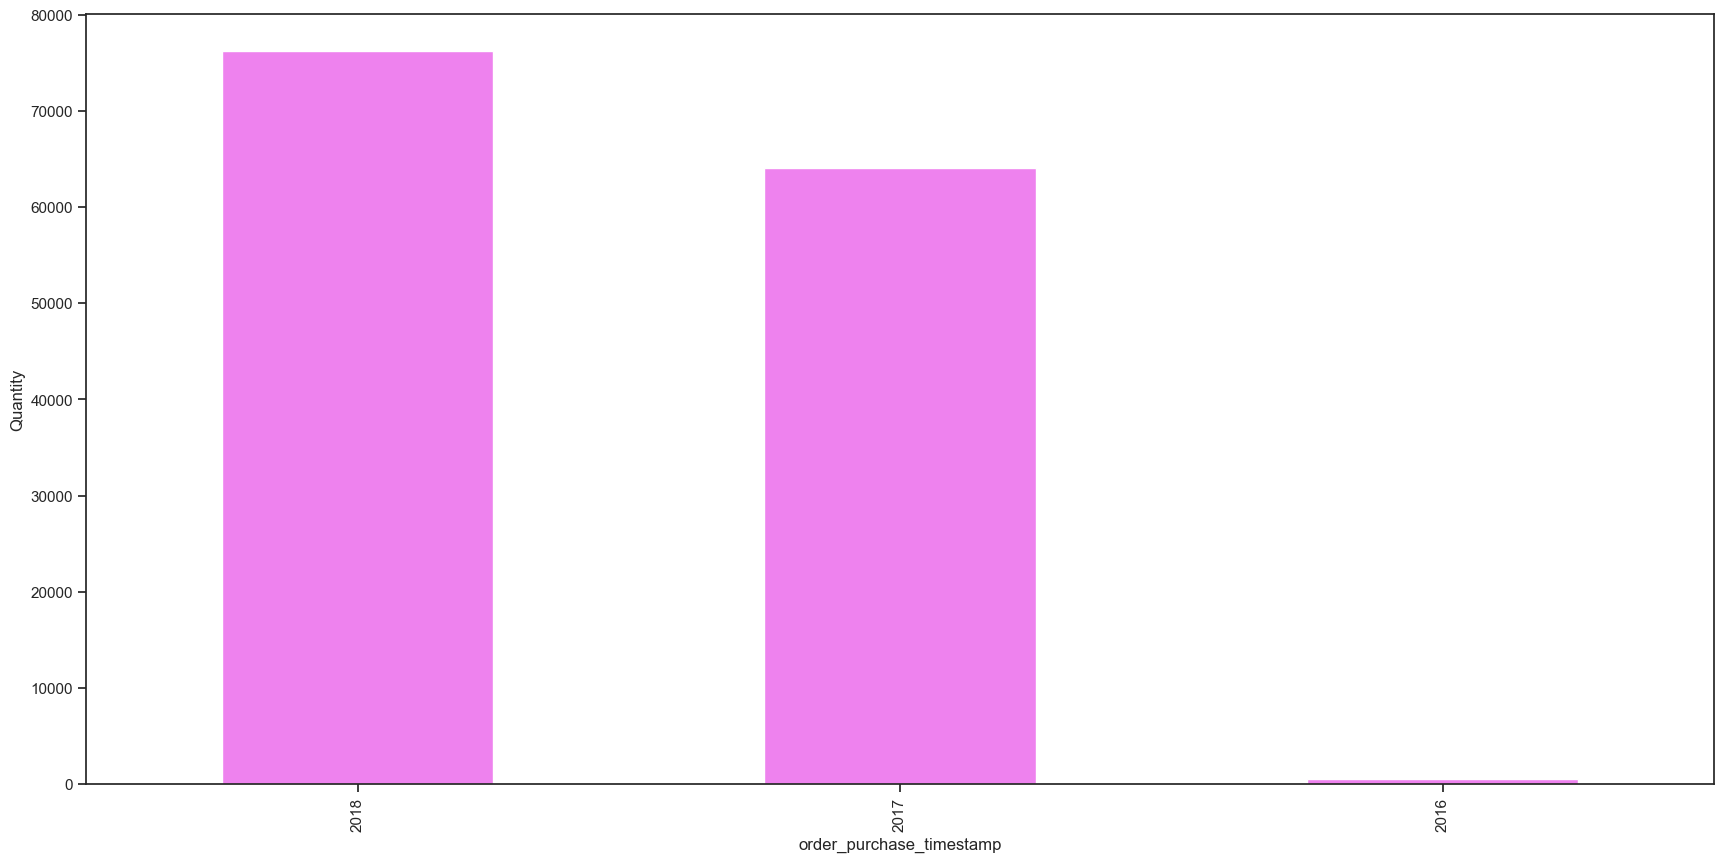

In [141]:
qty_year = df.groupby(df.order_purchase_timestamp.dt.year)[['order_item_id']].sum().sort_values(by = 'order_item_id', ascending = False)
qty_year.plot(kind = 'bar', figsize = (21,10),legend = None, color = 'violet')
plt.ylabel("Quantity")
plt.show()

## Quantity by week

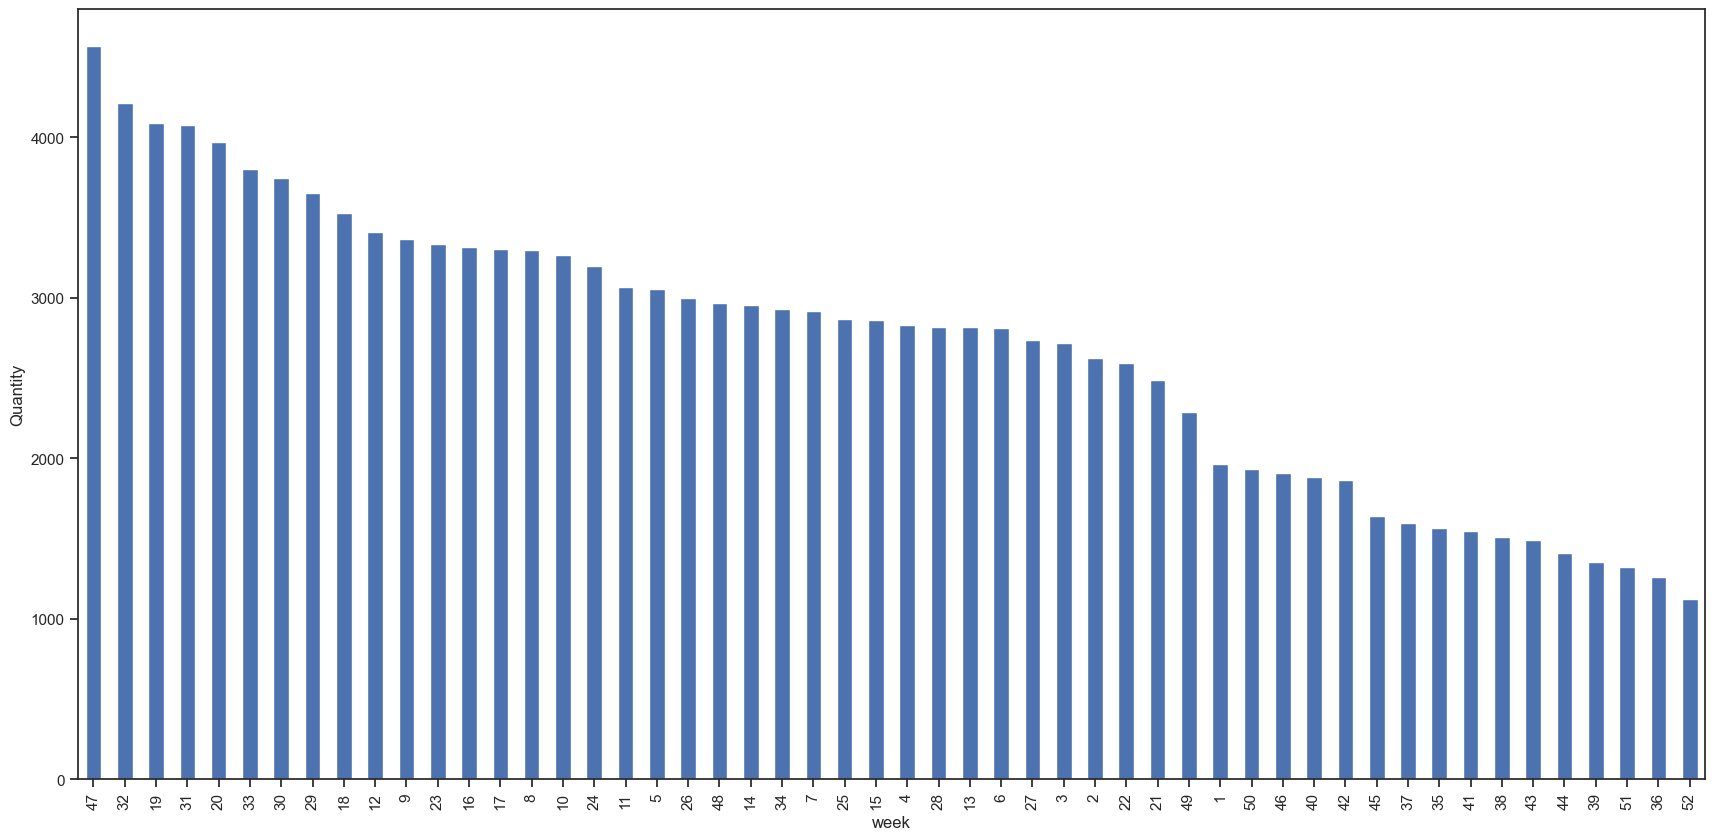

In [142]:
qty_week = df.groupby(df.order_purchase_timestamp.dt.isocalendar().week)[['order_item_id']].sum().sort_values(by = 'order_item_id', ascending = False)
qty_week.plot(kind = 'bar', figsize = (21,10),legend = None)
plt.ylabel("Quantity")
plt.show()

## Quantity by day

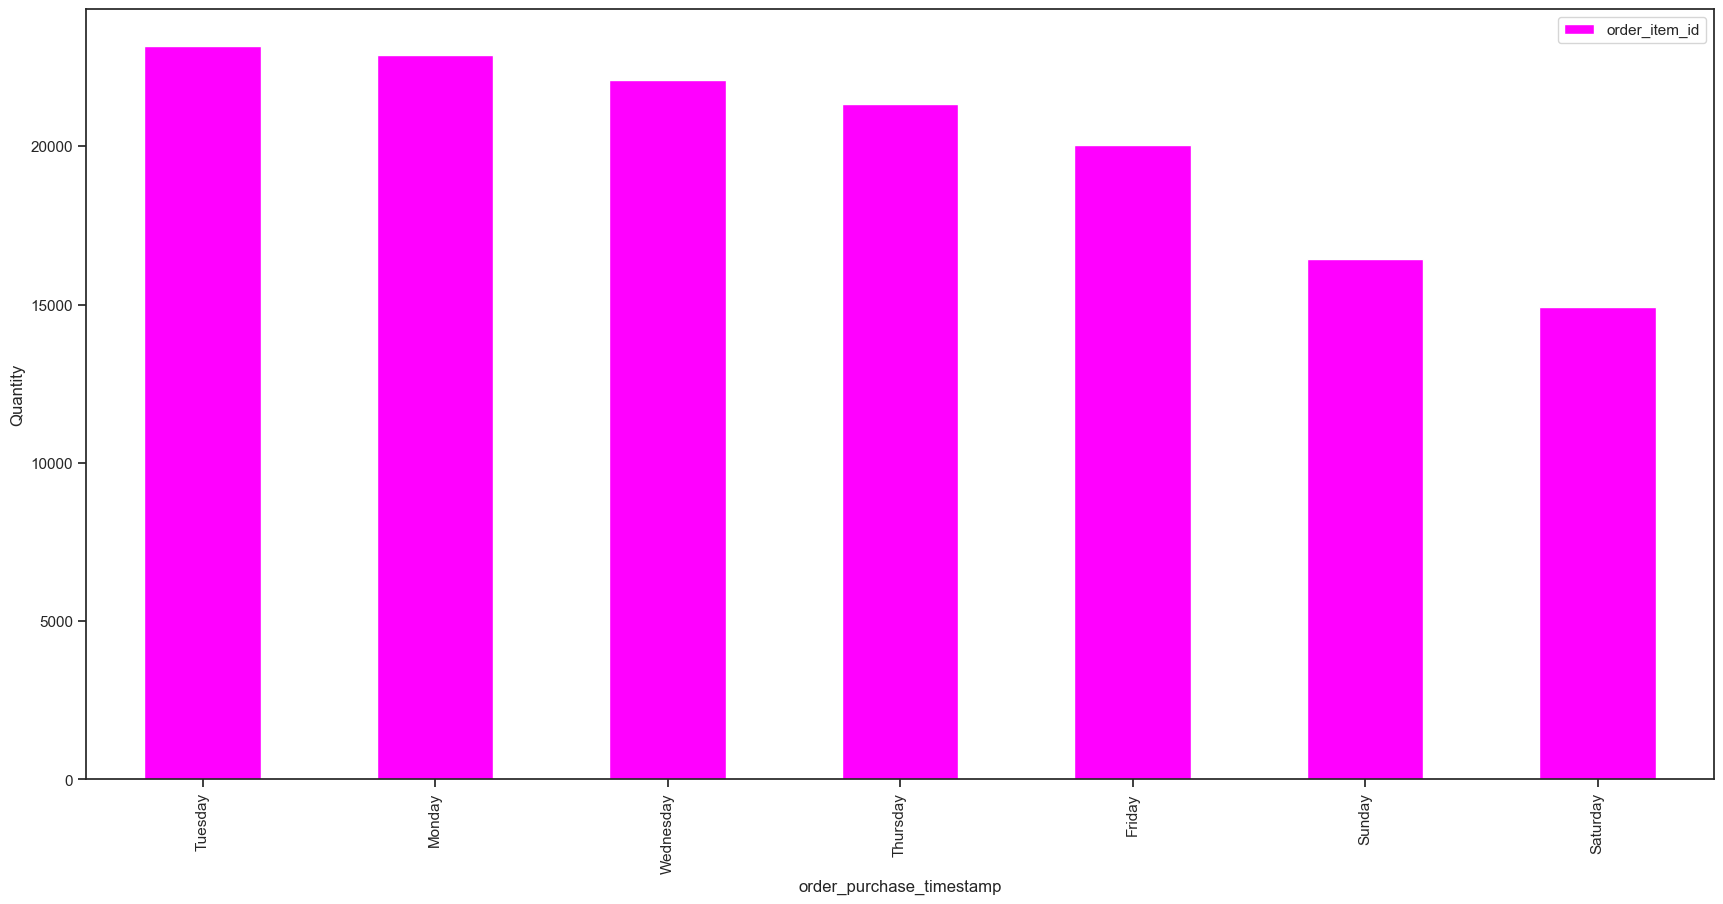

In [147]:
qty_day = df.groupby(df.order_purchase_timestamp.dt.day_name())[['order_item_id']].sum().sort_values(by = 'order_item_id', ascending = False)
qty_day.plot(kind = 'bar', figsize = (21,10), color = 'magenta')
plt.ylabel("Quantity")
plt.show()

## Quantity by time

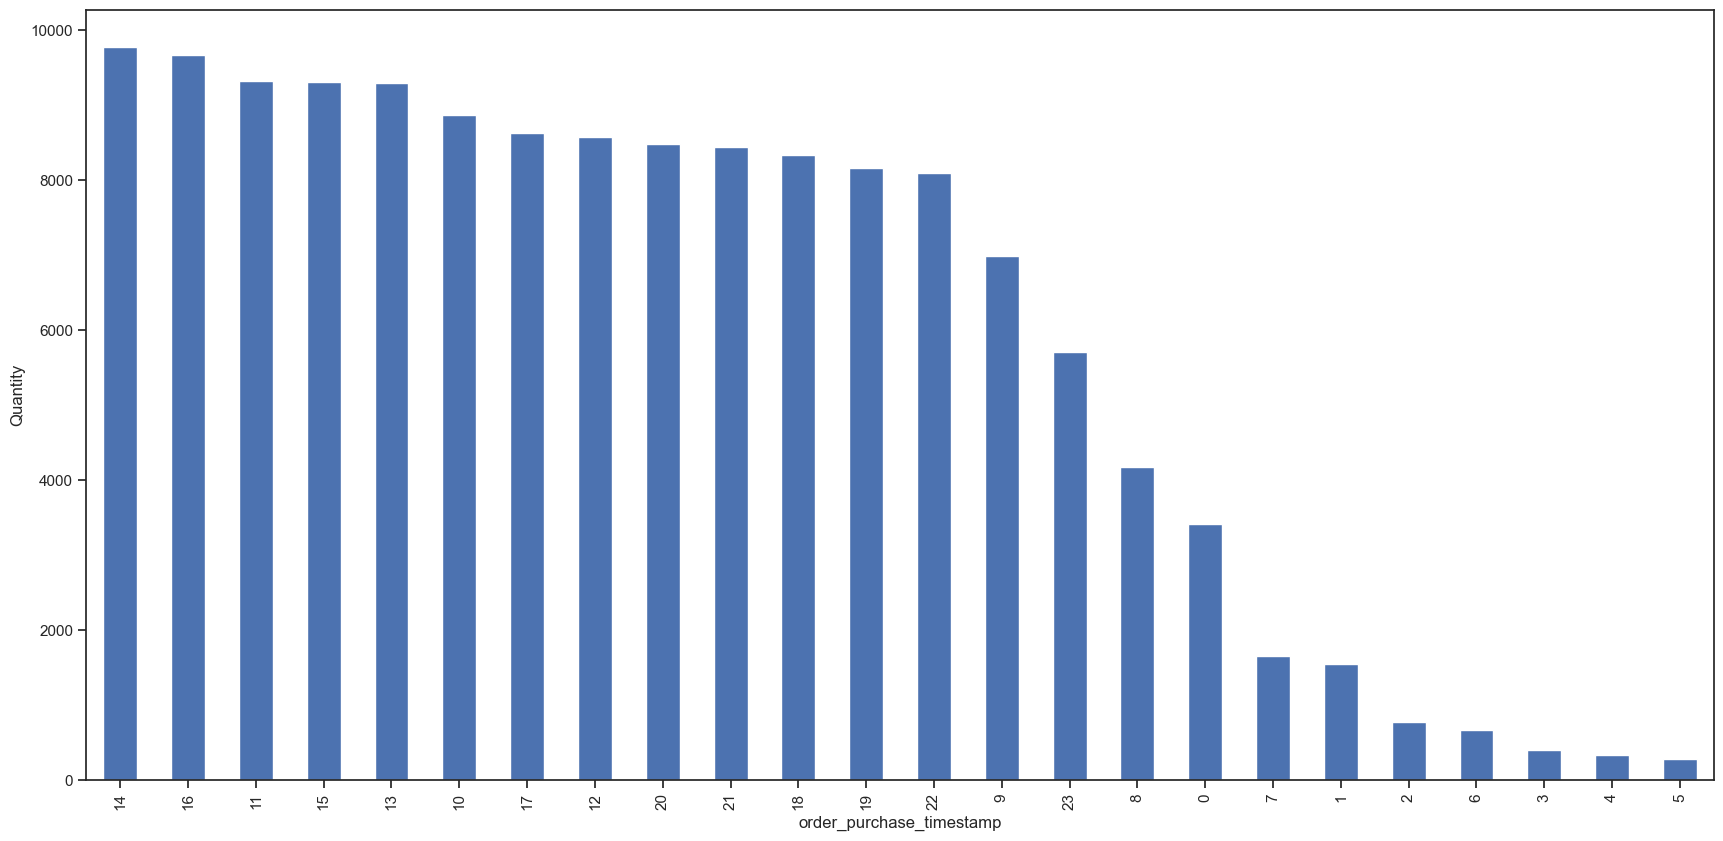

In [149]:
qty_hour = df.groupby(df.order_purchase_timestamp.dt.hour)[['order_item_id']].sum().sort_values(by = 'order_item_id', ascending = False)
qty_hour.plot(kind = 'bar', figsize = (21,10), legend = None)
plt.ylabel("Quantity")
plt.show()

## Quantity by payment methods

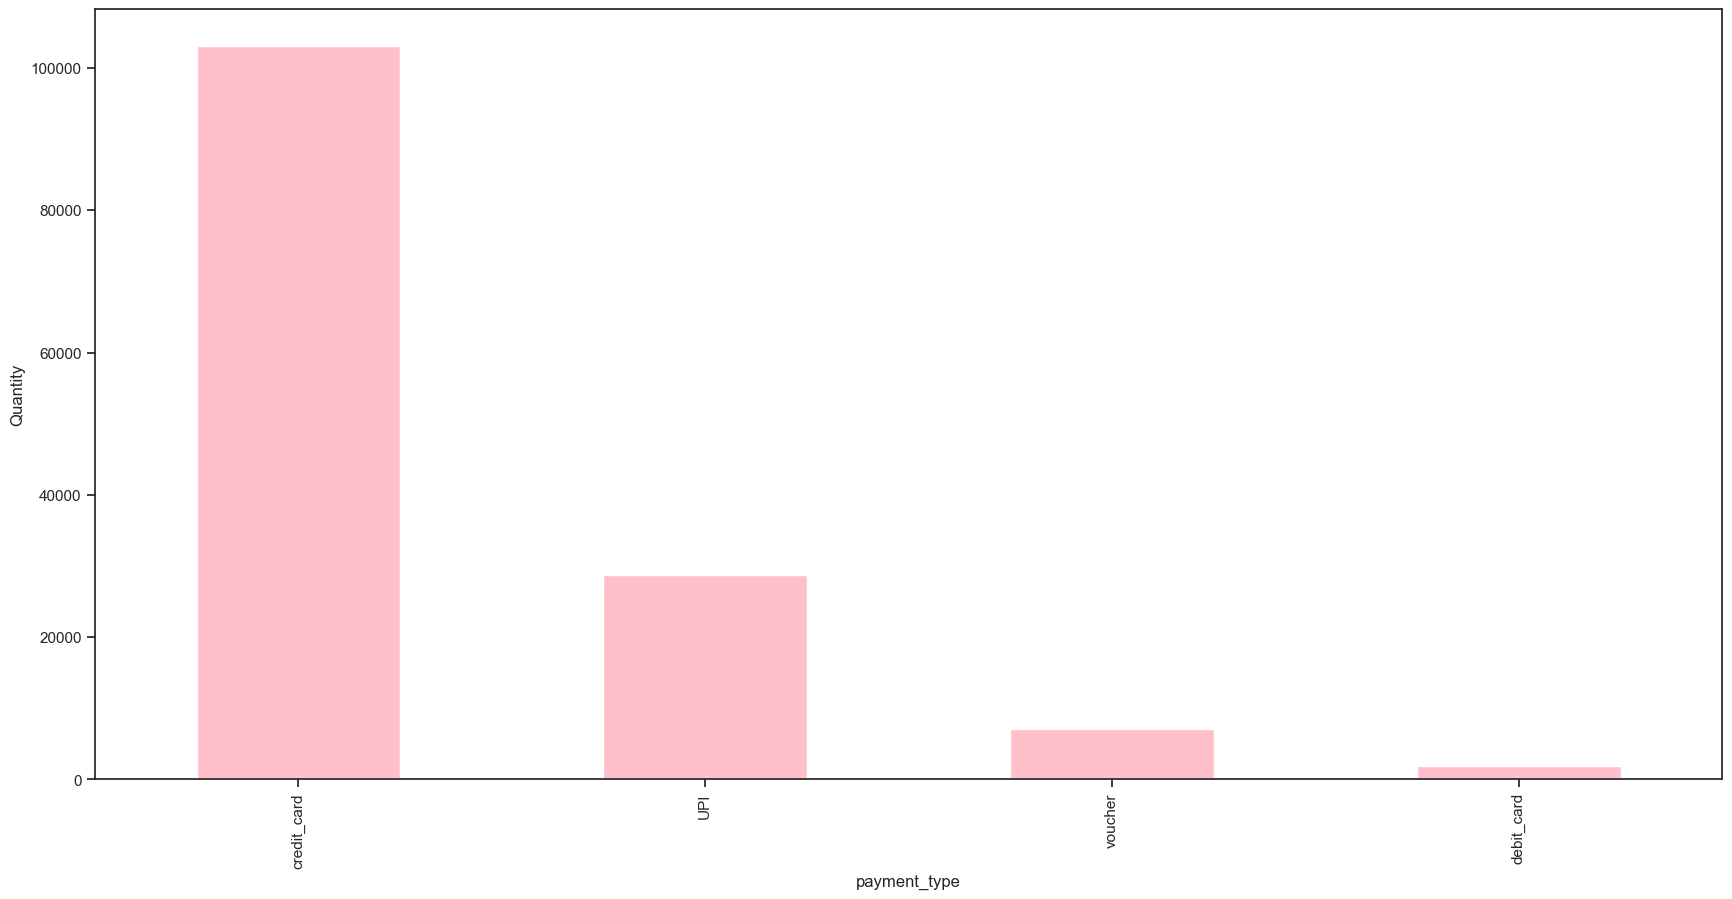

In [151]:
qty_pay_method = df.groupby('payment_type')[['order_item_id']].sum().sort_values(by = 'order_item_id', ascending = False)
qty_pay_method.plot(kind = 'bar', figsize = (21,10),legend = None, color = 'pink')
plt.ylabel("Quantity")
plt.show()

## f. Popular Products by month, seller, state, category.

### Top 5 products by month

Most popular products in January:


,order_purchase_timestamp,product_category_name,product_id,product_count
2170,1,Furniture_Decor,aca2eb7d00ea1a7b8ebd4e68314663af,139
2346,1,Garden_Tools,37eb69aca8718e843d897aa7b82f462d,120
4564,1,Watches_Gifts,a62e25e09e05e6faf31d90c6ec1aa3d1,118
1074,1,Computers_Accessories,36f60d45225e60c7da4558b070ce4b60,114
1449,1,Cool_Stuff,54d9ac713e253fa1fae9c8003b011c2a,78


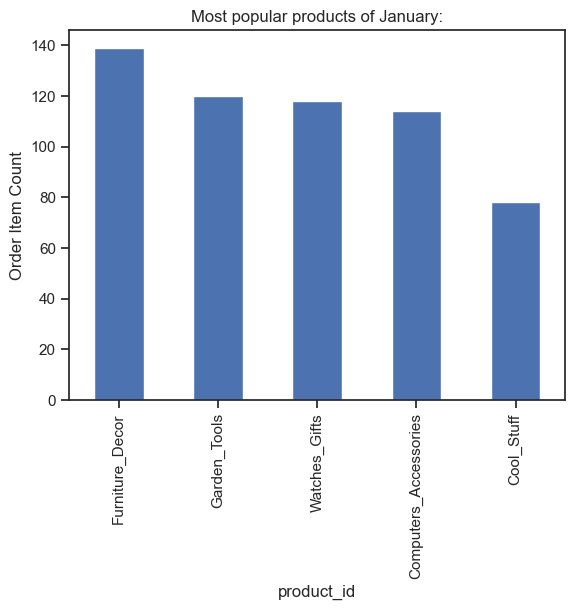

Most popular products in February:


,order_purchase_timestamp,product_category_name,product_id,product_count
5990,2,Computers_Accessories,ee3d532c8a438679776d222e997606b3,215
9060,2,Telephony,44a5d24dd383324a421569ca697b13c2,107
5976,2,Computers_Accessories,e53e557d5a159f5aa2c5e995dfdf244b,106
7094,2,Garden_Tools,368c6c730842d78016ad823897a372db,80
5770,2,Computers_Accessories,3dd2a17168ec895c781a9191c1e95ad7,79


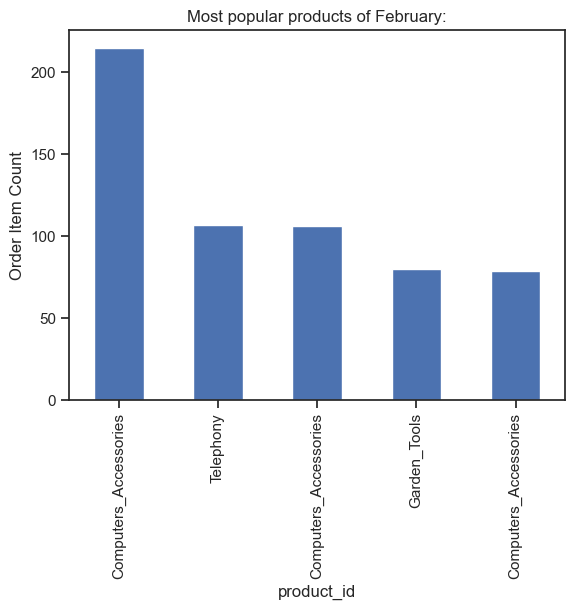

Most popular products in March:


,order_purchase_timestamp,product_category_name,product_id,product_count
12168,3,Furniture_Decor,aca2eb7d00ea1a7b8ebd4e68314663af,72
11094,3,Computers_Accessories,dbb67791e405873b259e4656bf971246,66
12585,3,Health_Beauty,437c05a395e9e47f9762e677a7068ce7,62
10886,3,Computers_Accessories,3dd2a17168ec895c781a9191c1e95ad7,57
12401,3,Garden_Tools,53759a2ecddad2bb87a079a1f1519f73,56


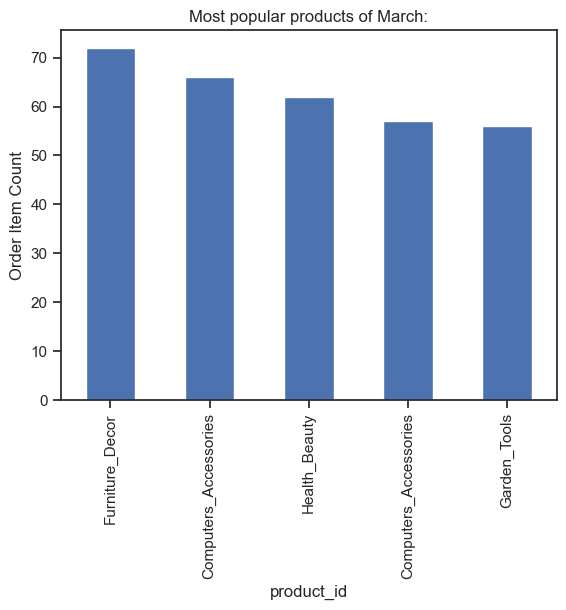

Most popular products in April:


,order_purchase_timestamp,product_category_name,product_id,product_count
17831,4,Furniture_Decor,aca2eb7d00ea1a7b8ebd4e68314663af,109
20592,4,Telephony,d34c07a2d817ac73f4caf8c574215fed,106
20941,4,Watches_Gifts,53b36df67ebb7c41585e8d54d6772e08,99
16809,4,Computers_Accessories,d1c427060a0f73f6b889a5c7c61f2ac4,66
18055,4,Garden_Tools,422879e10f46682990de24d770e7f83d,62


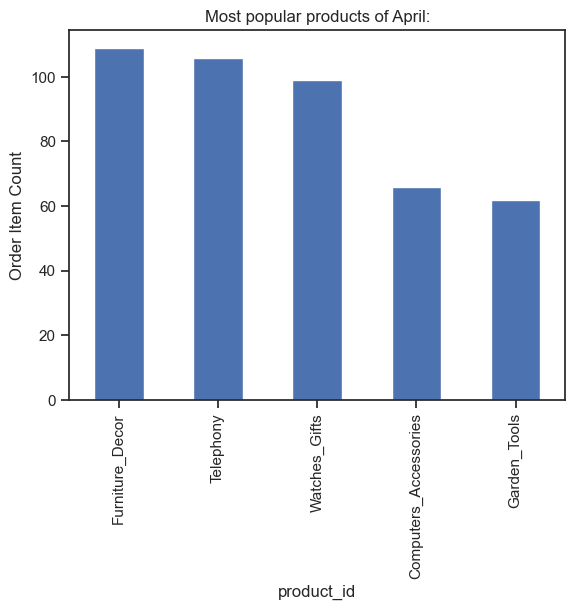

Most popular products in May:


,order_purchase_timestamp,product_category_name,product_id,product_count
27108,5,Watches_Gifts,53b36df67ebb7c41585e8d54d6772e08,123
23820,5,Furniture_Decor,aca2eb7d00ea1a7b8ebd4e68314663af,111
24053,5,Garden_Tools,422879e10f46682990de24d770e7f83d,108
22078,5,Bed_Bath_Table,99a4788cb24856965c36a24e339b6058,98
22508,5,Computers_Accessories,4e53a453045707bbc5febcf5f32097ac,84


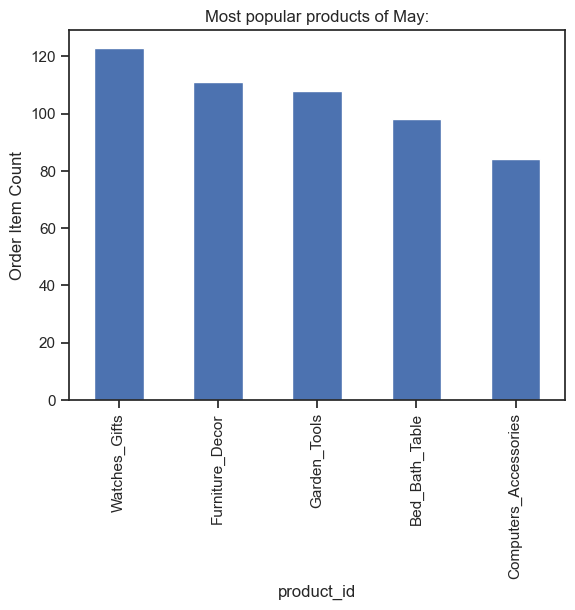

Most popular products in June:


,order_purchase_timestamp,product_category_name,product_id,product_count
28252,6,Bed_Bath_Table,99a4788cb24856965c36a24e339b6058,89
30924,6,Housewares,42a2c92a0979a949ca4ea89ec5c7b934,82
31137,6,Housewares,ac1ad58efc1ebf66bfadc09f29bdedc0,44
33090,6,Watches_Gifts,a92930c327948861c015c919a0bcb4a8,44
30194,6,Health_Beauty,19c91ef95d509ea33eda93495c4d3481,43


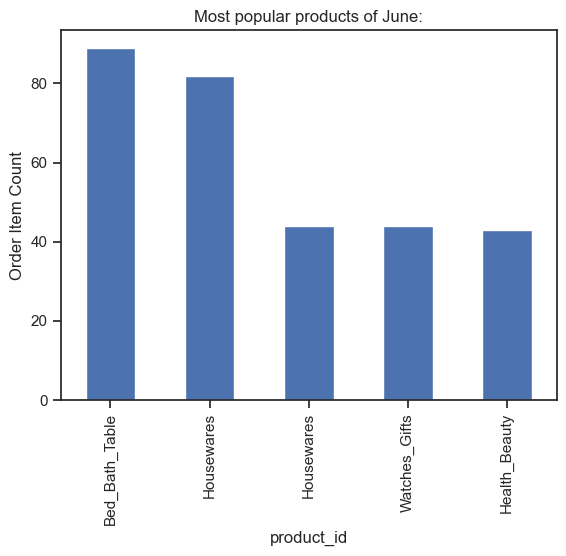

Most popular products in July:


,order_purchase_timestamp,product_category_name,product_id,product_count
36394,7,Health_Beauty,270516a3f41dc035aa87d220228f844c,145
34236,7,Bed_Bath_Table,99a4788cb24856965c36a24e339b6058,77
37079,7,Housewares,32e18e89237933ebdaaebd78a27e7fa1,69
34466,7,Bed_Bath_Table,f1c7f353075ce59d8a6f3cf58f419c9c,65
36318,7,Health_Beauty,05b515fdc76e888aada3c6d66c201dff,65


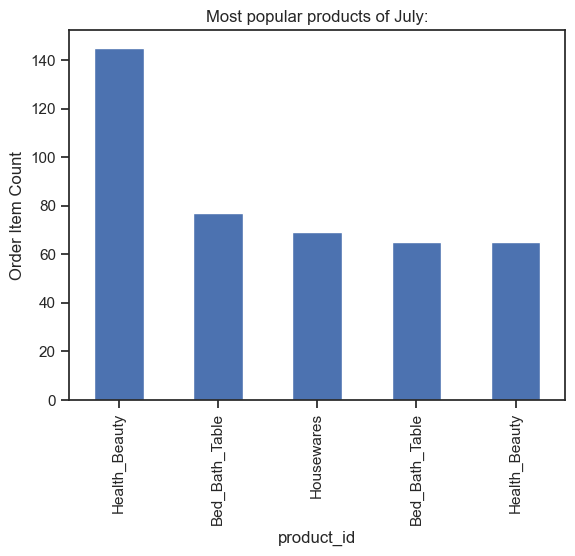

Most popular products in August:


,order_purchase_timestamp,product_category_name,product_id,product_count
39914,8,Auto,9571759451b1d780ee7c15012ea109d4,210
46064,8,Telephony,e7cc48a9daff5436f63d3aad9426f28b,139
42956,8,Garden_Tools,422879e10f46682990de24d770e7f83d,71
40983,8,Bed_Bath_Table,ebf9bc6cd600eadd681384e3116fda85,63
44049,8,Housewares,5ddab10d5e0a23acb99acf56b62b3276,63


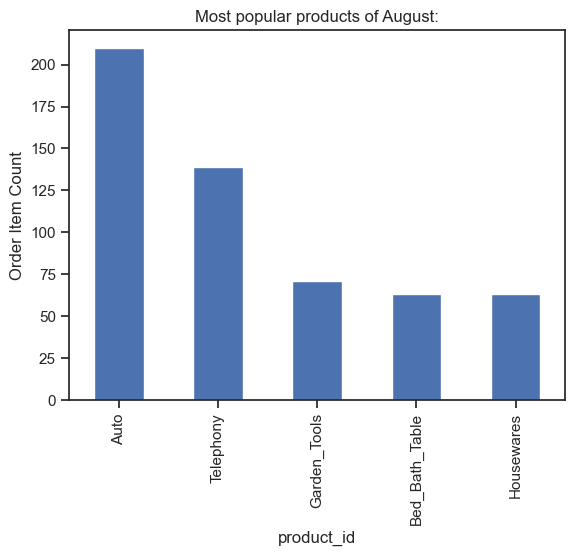

Most popular products in September:


,order_purchase_timestamp,product_category_name,product_id,product_count
47317,9,Computers_Accessories,d5991653e037ccb7af6ed7d94246b249,57
48485,9,Office_Furniture,0554911df28fda9fd668ce5ba5949695,57
47977,9,Garden_Tools,b0961721fd839e9982420e807758a2a6,55
47953,9,Garden_Tools,422879e10f46682990de24d770e7f83d,44
48512,9,Office_Furniture,cbdb9bf611328898bd4b32a384506b3a,42


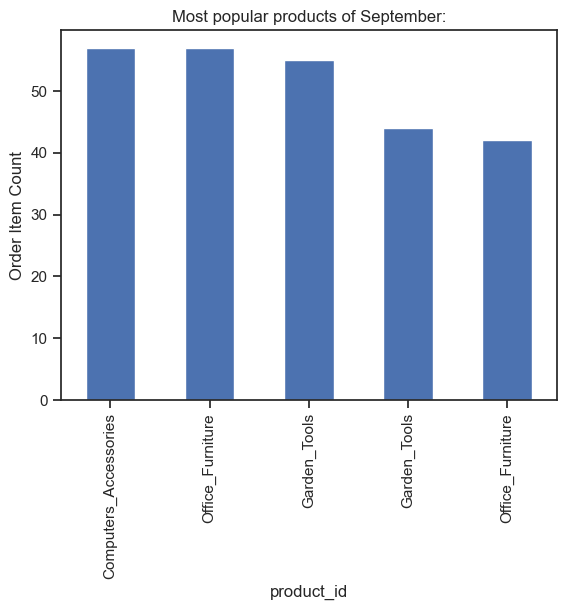

Most popular products in October:


,order_purchase_timestamp,product_category_name,product_id,product_count
51319,10,Housewares,03e1c946c0ddfc58724ff262aef08dff,78
50996,10,Garden_Tools,422879e10f46682990de24d770e7f83d,73
50885,10,Furniture_Decor,b532349fe46b38fbc7bb3914c1bdae07,56
50993,10,Garden_Tools,368c6c730842d78016ad823897a372db,54
50145,10,Computers_Accessories,54d7ad85b648d3cb2b7069ed446d7f35,52


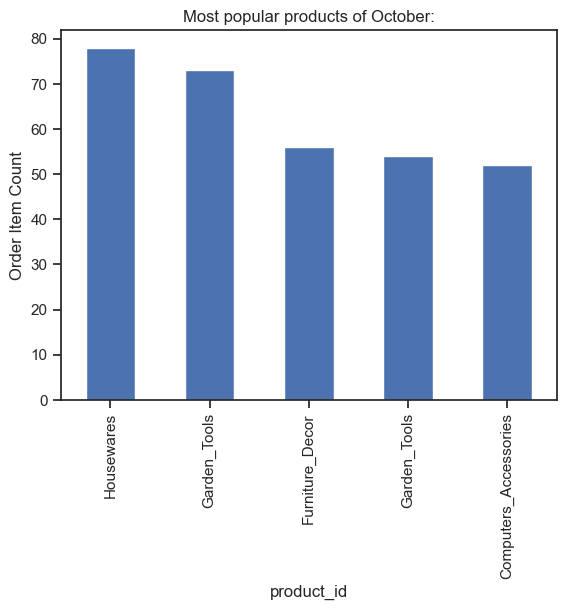

Most popular products in November:


,order_purchase_timestamp,product_category_name,product_id,product_count
54900,11,Garden_Tools,389d119b48cf3043d311335e499d9c6b,136
54904,11,Garden_Tools,422879e10f46682990de24d770e7f83d,131
54685,11,Furniture_Decor,89b190a046022486c635022524a974a8,120
54912,11,Garden_Tools,53759a2ecddad2bb87a079a1f1519f73,114
54897,11,Garden_Tools,368c6c730842d78016ad823897a372db,91


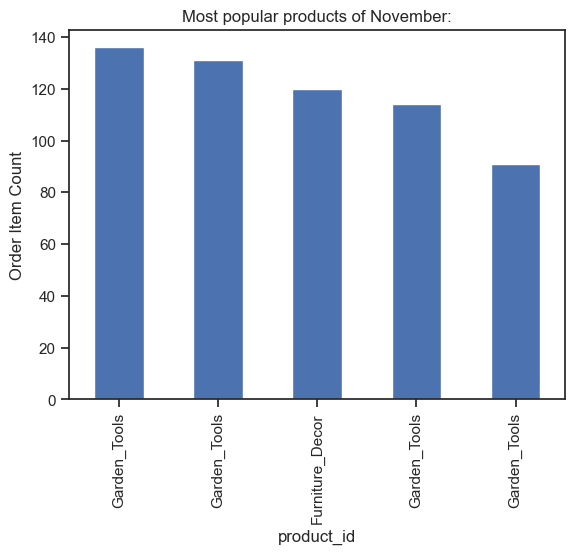

Most popular products in December:


,order_purchase_timestamp,product_category_name,product_id,product_count
58779,12,Garden_Tools,422879e10f46682990de24d770e7f83d,166
58776,12,Garden_Tools,368c6c730842d78016ad823897a372db,68
58683,12,Furniture_Decor,aca2eb7d00ea1a7b8ebd4e68314663af,63
58784,12,Garden_Tools,53759a2ecddad2bb87a079a1f1519f73,58
58887,12,Health_Beauty,4c2394abfbac7ff59ec7a420918562fa,53


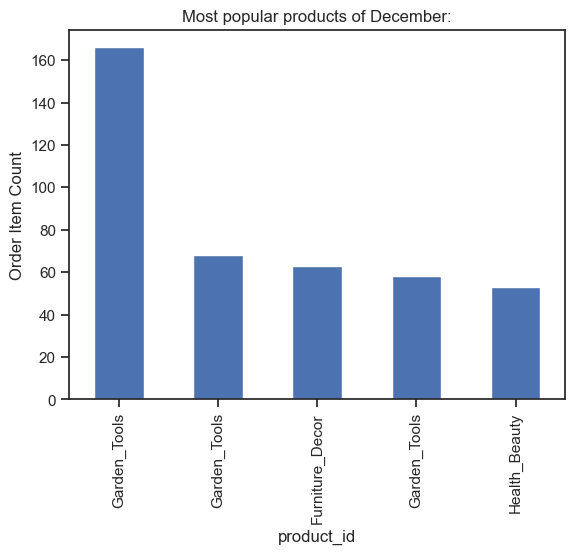

In [152]:
# Group by month and product
monthly_products = df.groupby([df.order_purchase_timestamp.dt.month, 'product_category_name', 'product_id'])[['order_item_id']].sum()

# Rename columns
monthly_products.columns = ['product_count']

# Reset index to flatten the dataframe
monthly_products = monthly_products.reset_index()

# Sort by count in descending order
monthly_products = monthly_products.sort_values(['order_purchase_timestamp', 'product_count'], ascending=[True, False])


month_name = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

# Show the most popular products for each month
for month in range(1,13):
    print(f"Most popular products in {month_name[month]}:")
    display(monthly_products[monthly_products.order_purchase_timestamp == month].head(5))
    monthly_products[monthly_products.order_purchase_timestamp == month].head(5).plot(kind='bar', x='product_category_name', y='product_count',legend=None)
    plt.xlabel('product_id')
    plt.ylabel('Order Item Count')
    plt.title(f"Most popular products of {month_name[month]}:")
    plt.show()



### Top 5 products by seller

In [156]:
seller_products = df.groupby(['seller_id', 'product_id'])[['order_item_id']].sum().reset_index().sort_values(by ='order_item_id', ascending = False )
seller_products.head(15)

,seller_id,product_id,order_item_id
4637,1f50f920176fa81dab994f9023523100,422879e10f46682990de24d770e7f83d,825
20932,955fee9216a65b617aa5c0531780ce60,aca2eb7d00ea1a7b8ebd4e68314663af,648
9827,4a3ca9315b744ce9f8e9374361493884,99a4788cb24856965c36a24e339b6058,581
4639,1f50f920176fa81dab994f9023523100,53759a2ecddad2bb87a079a1f1519f73,563
4634,1f50f920176fa81dab994f9023523100,368c6c730842d78016ad823897a372db,560
4635,1f50f920176fa81dab994f9023523100,389d119b48cf3043d311335e499d9c6b,552
22113,a1043bafd471dff536d0c462352beb48,d1c427060a0f73f6b889a5c7c61f2ac4,382
13339,634964b17796e64304cadf1ad3050fb7,a62e25e09e05e6faf31d90c6ec1aa3d1,369
2394,1025f0e2d44d7041d6cf58b6550e0bfa,b532349fe46b38fbc7bb3914c1bdae07,321
26667,cc419e0650a3c5ba77189a1882b7556a,154e7e31ebfa092203795c972e5804a6,311


In [157]:
top_sellers = seller_products.seller_id.unique()[:10]

In [158]:
top_sellers

array(['1f50f920176fa81dab994f9023523100',
       '955fee9216a65b617aa5c0531780ce60',
       '4a3ca9315b744ce9f8e9374361493884',
       'a1043bafd471dff536d0c462352beb48',
       '634964b17796e64304cadf1ad3050fb7',
       '1025f0e2d44d7041d6cf58b6550e0bfa',
       'cc419e0650a3c5ba77189a1882b7556a',
       'de722cd6dad950a92b7d4f82673f8833',
       'f7ba60f8c3f99e7ee4042fdef03b70c4',
       '25c5c91f63607446a97b143d2d535d31'], dtype=object)

Most popular products of 1f50f920176fa81dab994f9023523100:


,seller_id,product_id,order_item_id
4637,1f50f920176fa81dab994f9023523100,422879e10f46682990de24d770e7f83d,825
4639,1f50f920176fa81dab994f9023523100,53759a2ecddad2bb87a079a1f1519f73,563
4634,1f50f920176fa81dab994f9023523100,368c6c730842d78016ad823897a372db,560
4635,1f50f920176fa81dab994f9023523100,389d119b48cf3043d311335e499d9c6b,552
4644,1f50f920176fa81dab994f9023523100,b0961721fd839e9982420e807758a2a6,181


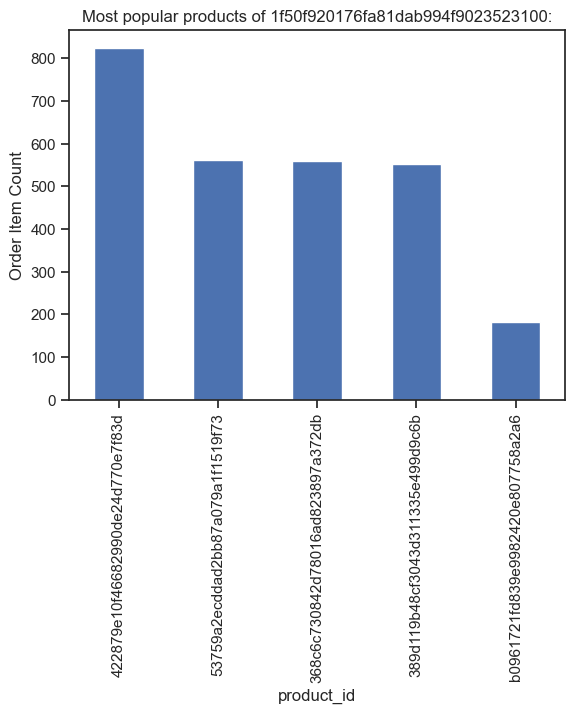

Most popular products of 955fee9216a65b617aa5c0531780ce60:


,seller_id,product_id,order_item_id
20932,955fee9216a65b617aa5c0531780ce60,aca2eb7d00ea1a7b8ebd4e68314663af,648
20922,955fee9216a65b617aa5c0531780ce60,928e52a9ad53a294fdcc91bcf59d1751,129
20892,955fee9216a65b617aa5c0531780ce60,54d9ac713e253fa1fae9c8003b011c2a,116
20867,955fee9216a65b617aa5c0531780ce60,2948658cb6abc82847412be7201bfc4c,77
20863,955fee9216a65b617aa5c0531780ce60,216bb0e0cd43ffd832e0973d35e0377e,73


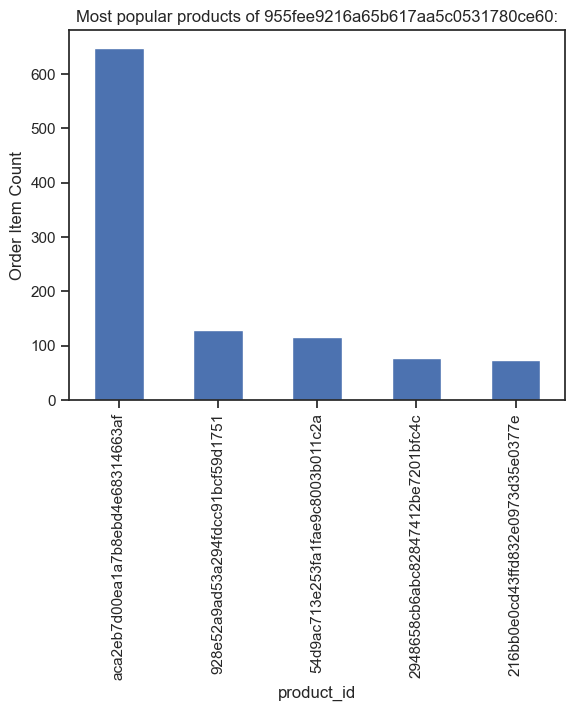

Most popular products of 4a3ca9315b744ce9f8e9374361493884:


,seller_id,product_id,order_item_id
9827,4a3ca9315b744ce9f8e9374361493884,99a4788cb24856965c36a24e339b6058,581
9679,4a3ca9315b744ce9f8e9374361493884,35afc973633aaeb6b877ff57b2793310,221
9785,4a3ca9315b744ce9f8e9374361493884,777d2e438a1b645f3aec9bd57e92672c,125
9801,4a3ca9315b744ce9f8e9374361493884,84f456958365164420cfc80fbe4c7fab,124
9758,4a3ca9315b744ce9f8e9374361493884,64fb265487de2238627ce43fe8a67efc,77


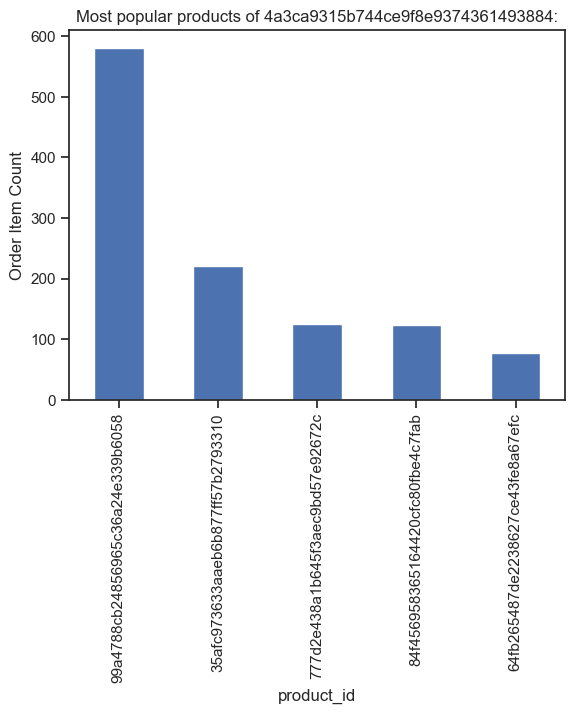

Most popular products of a1043bafd471dff536d0c462352beb48:


,seller_id,product_id,order_item_id
22113,a1043bafd471dff536d0c462352beb48,d1c427060a0f73f6b889a5c7c61f2ac4,382
22112,a1043bafd471dff536d0c462352beb48,c4baedd846ed09b85f78a781b522f126,174
22111,a1043bafd471dff536d0c462352beb48,8c591ab0ca519558779df02023177f44,158
22110,a1043bafd471dff536d0c462352beb48,52c80cedd4e90108bf4fa6a206ef6b03,133
22108,a1043bafd471dff536d0c462352beb48,37b99aa22bbac19b2a4afc4b2a958a53,20


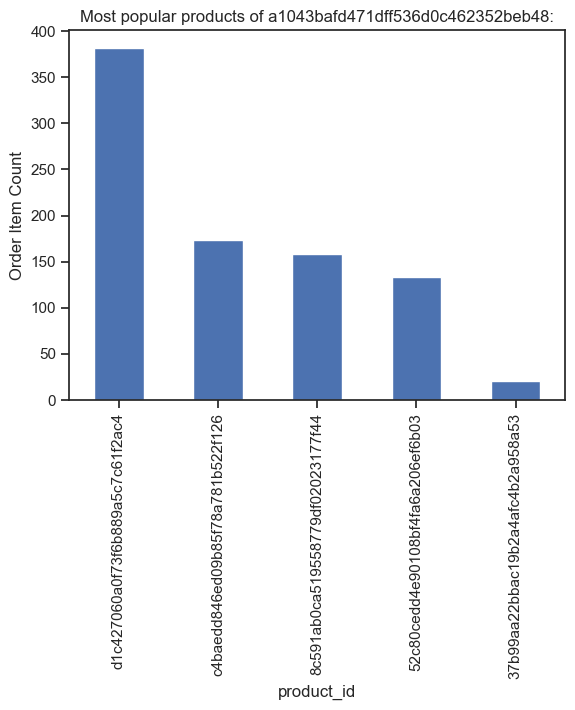

Most popular products of 634964b17796e64304cadf1ad3050fb7:


,seller_id,product_id,order_item_id
13339,634964b17796e64304cadf1ad3050fb7,a62e25e09e05e6faf31d90c6ec1aa3d1,369
13342,634964b17796e64304cadf1ad3050fb7,bfc0d01be79d9038c7720f983bf954e0,17
13328,634964b17796e64304cadf1ad3050fb7,332842d24e84234cd91299a225de76ab,17
13340,634964b17796e64304cadf1ad3050fb7,a91c1a94d83d36316c44e00e738607b1,13
13336,634964b17796e64304cadf1ad3050fb7,88b0e43d1df085c4e8c2be324e3785f3,12


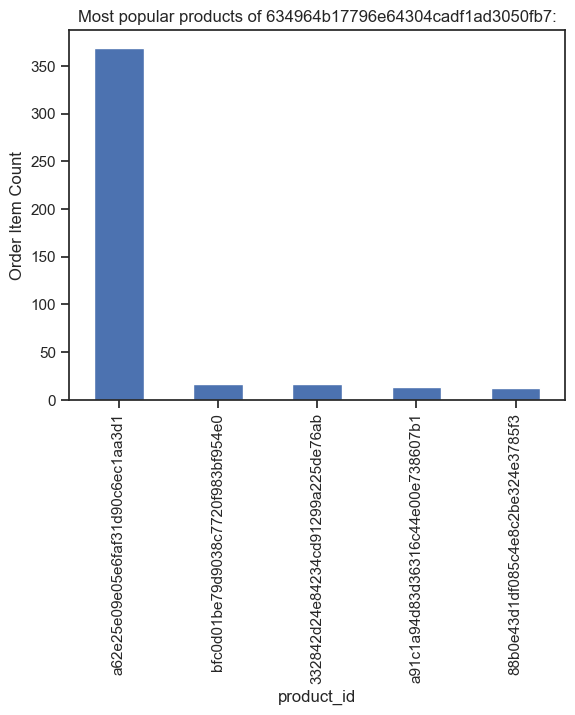

Most popular products of 1025f0e2d44d7041d6cf58b6550e0bfa:


,seller_id,product_id,order_item_id
2394,1025f0e2d44d7041d6cf58b6550e0bfa,b532349fe46b38fbc7bb3914c1bdae07,321
2367,1025f0e2d44d7041d6cf58b6550e0bfa,9ecadb84c81da840dbf3564378b586e9,212
2433,1025f0e2d44d7041d6cf58b6550e0bfa,eb8c629f70275fd1c4f809116cce1efc,175
2370,1025f0e2d44d7041d6cf58b6550e0bfa,a19b6951c75da43aad691622dd2f6abe,113
2404,1025f0e2d44d7041d6cf58b6550e0bfa,c7fd13b5e515bffdab855d0812842edb,103


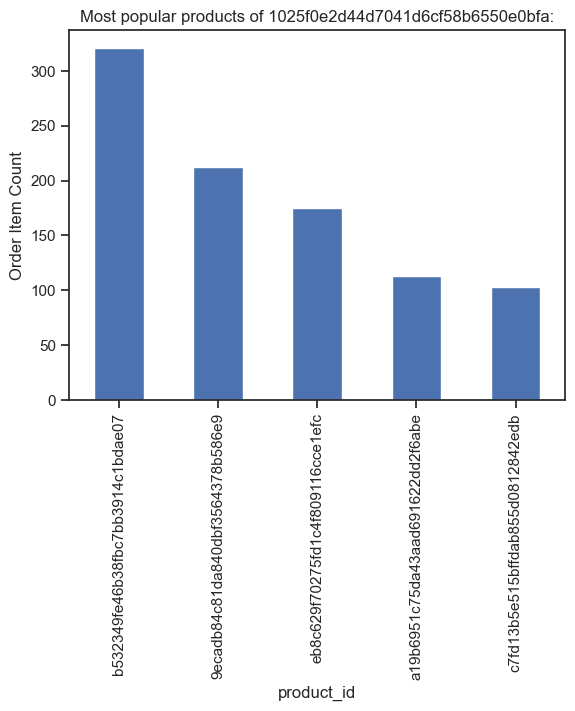

Most popular products of cc419e0650a3c5ba77189a1882b7556a:


,seller_id,product_id,order_item_id
26667,cc419e0650a3c5ba77189a1882b7556a,154e7e31ebfa092203795c972e5804a6,311
26672,cc419e0650a3c5ba77189a1882b7556a,2b4609f8948be18874494203496bc318,279
26681,cc419e0650a3c5ba77189a1882b7556a,7c1bd920dbdf22470b68bde975dd3ccf,250
26669,cc419e0650a3c5ba77189a1882b7556a,2028bf1b01cafb2d2b1901fca4083222,162
26677,cc419e0650a3c5ba77189a1882b7556a,4c2394abfbac7ff59ec7a420918562fa,127


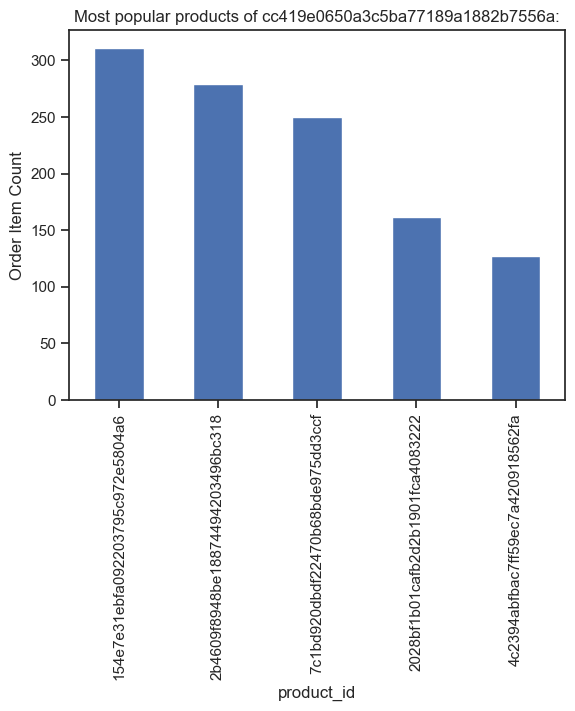

Most popular products of de722cd6dad950a92b7d4f82673f8833:


,seller_id,product_id,order_item_id
29903,de722cd6dad950a92b7d4f82673f8833,3dd2a17168ec895c781a9191c1e95ad7,310
29905,de722cd6dad950a92b7d4f82673f8833,909b87db6cb3a7ab26bd03cc59860136,53
29907,de722cd6dad950a92b7d4f82673f8833,b192be433004cc1f10b467c0e9ea309b,48
29906,de722cd6dad950a92b7d4f82673f8833,a291cc846d74d97f01611894f983073b,20
29909,de722cd6dad950a92b7d4f82673f8833,c63ea4621680c1b0fca8864c0564bd78,19


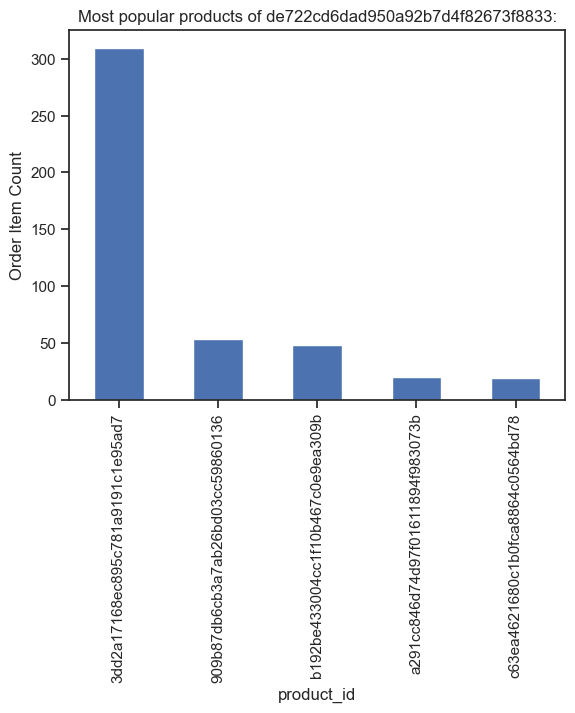

Most popular products of f7ba60f8c3f99e7ee4042fdef03b70c4:


,seller_id,product_id,order_item_id
33135,f7ba60f8c3f99e7ee4042fdef03b70c4,bb50f2e236e5eea0100680137654686c,240
33130,f7ba60f8c3f99e7ee4042fdef03b70c4,0fe922b7f7d43ef454bbc241416e7401,17
33137,f7ba60f8c3f99e7ee4042fdef03b70c4,f48eb5c2fde13ca63664f0bb05f55346,9
33136,f7ba60f8c3f99e7ee4042fdef03b70c4,f110a8fd4a8052d5717ce2adc2bb71d0,4
33133,f7ba60f8c3f99e7ee4042fdef03b70c4,9b1954fdd0f9b4ef4ee2d267ac9de4bd,4


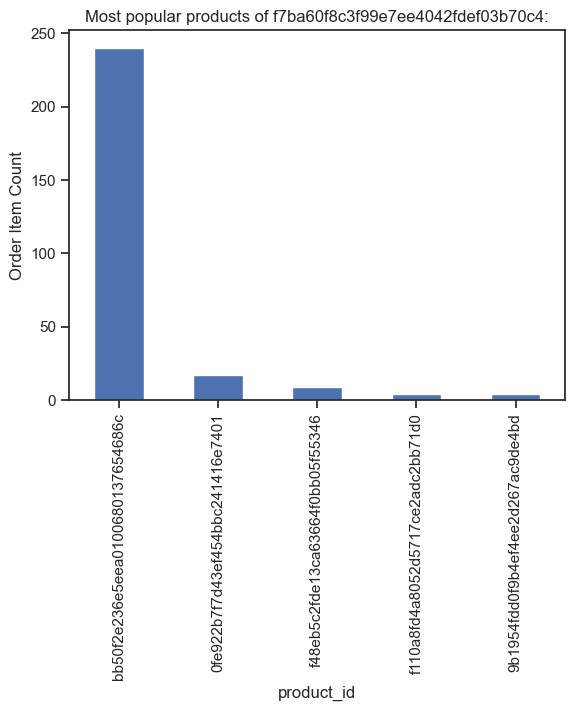

Most popular products of 25c5c91f63607446a97b143d2d535d31:


,seller_id,product_id,order_item_id
5579,25c5c91f63607446a97b143d2d535d31,d5991653e037ccb7af6ed7d94246b249,240
5570,25c5c91f63607446a97b143d2d535d31,54d7ad85b648d3cb2b7069ed446d7f35,74
5565,25c5c91f63607446a97b143d2d535d31,167b4b8c4bd0c401bea62f5e050d70a4,39
5580,25c5c91f63607446a97b143d2d535d31,dc9471db933efad7bf0ce685380578bd,36
5572,25c5c91f63607446a97b143d2d535d31,62d41a80c366aa2d8644e3270adf8440,35


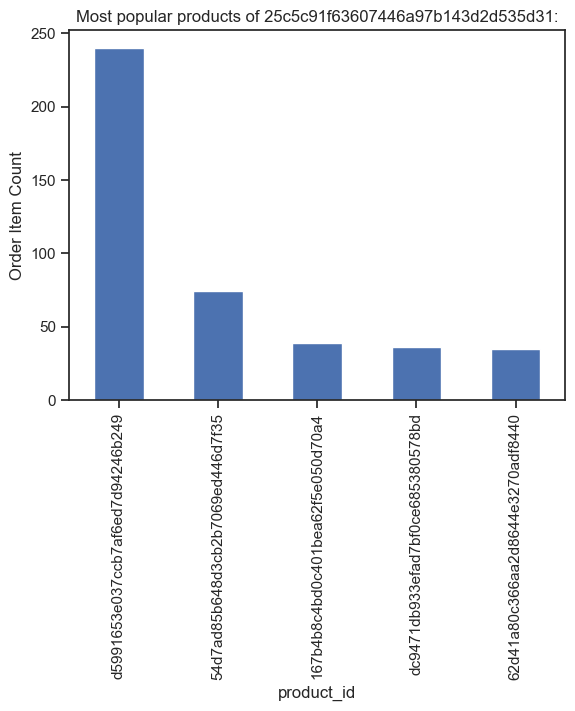

In [159]:
# Show the most popular 10 products for top 10 sellers
for seller in top_sellers:
    print(f"Most popular products of {seller}:")
    display(seller_products[seller_products.seller_id == seller].head(5))
    seller_products[seller_products.seller_id == seller].head(5).plot(kind='bar', x='product_id', y='order_item_id', legend=None)
    plt.xlabel('product_id')
    plt.ylabel('Order Item Count')
    plt.title(f"Most popular products of {seller}:")
    plt.show()


### Top 10 products by state

In [160]:
top_prod_by_states = df.groupby(["geolocation_state_cust", 'product_id'])[['order_item_id']].sum().reset_index().sort_values('order_item_id', ascending = False)
top_prod_by_states.head()

,geolocation_state_cust,product_id,order_item_id
6490,Andhra Pradesh,422879e10f46682990de24d770e7f83d,515
16649,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,443
14868,Andhra Pradesh,99a4788cb24856965c36a24e339b6058,371
5529,Andhra Pradesh,389d119b48cf3043d311335e499d9c6b,320
5298,Andhra Pradesh,368c6c730842d78016ad823897a372db,316


In [161]:
top_states = top_prod_by_states.geolocation_state_cust.unique()[:5]
top_states

array(['Andhra Pradesh', 'Jammu & Kashmir', 'Chhattisgarh', 'Gujarat',
       'Arunachal Pradesh'], dtype=object)

Most popular products of Andhra Pradesh:


,geolocation_state_cust,product_id,order_item_id
6490,Andhra Pradesh,422879e10f46682990de24d770e7f83d,515
16649,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,443
14868,Andhra Pradesh,99a4788cb24856965c36a24e339b6058,371
5529,Andhra Pradesh,389d119b48cf3043d311335e499d9c6b,320
5298,Andhra Pradesh,368c6c730842d78016ad823897a372db,316


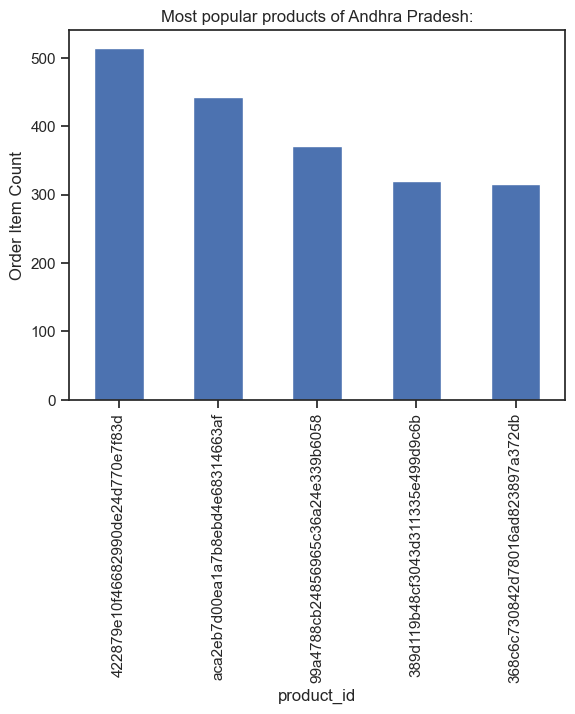

Most popular products of Jammu & Kashmir:


,geolocation_state_cust,product_id,order_item_id
40764,Jammu & Kashmir,89b190a046022486c635022524a974a8,120
40962,Jammu & Kashmir,b114bf337c0626166abe574eee9e3f32,27
40588,Jammu & Kashmir,61b6e5d2e3ee58d2b341b8ef1a652b26,21
40889,Jammu & Kashmir,a3a10562c9d134b92f04b8cce298d037,21
40366,Jammu & Kashmir,368c6c730842d78016ad823897a372db,20


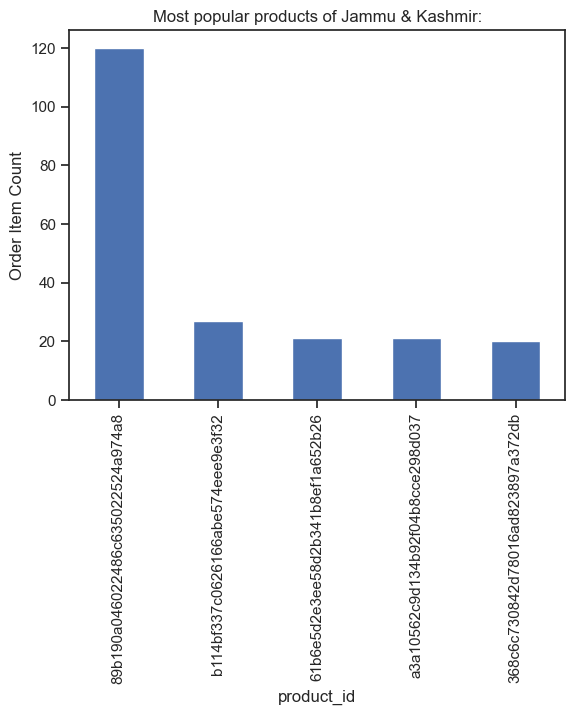

Most popular products of Chhattisgarh:


,geolocation_state_cust,product_id,order_item_id
26849,Chhattisgarh,44a5d24dd383324a421569ca697b13c2,105
26794,Chhattisgarh,422879e10f46682990de24d770e7f83d,63
26583,Chhattisgarh,368c6c730842d78016ad823897a372db,59
28398,Chhattisgarh,9ecadb84c81da840dbf3564378b586e9,52
27085,Chhattisgarh,53759a2ecddad2bb87a079a1f1519f73,46


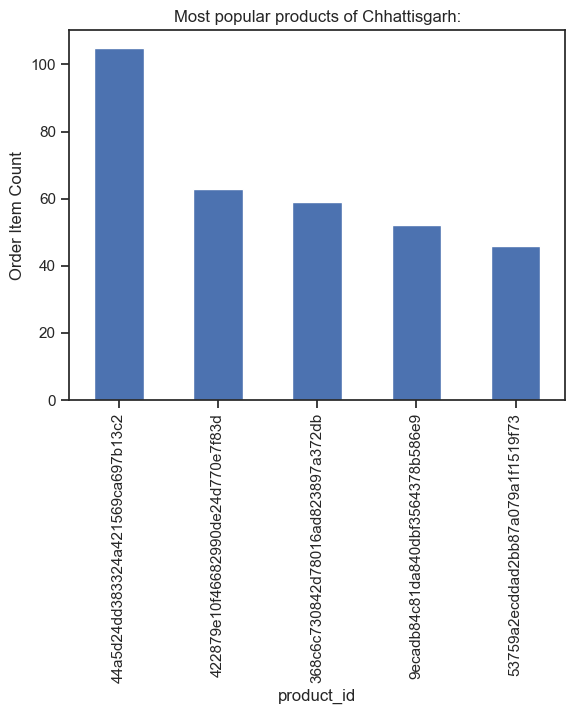

Most popular products of Gujarat:


,geolocation_state_cust,product_id,order_item_id
34265,Gujarat,53759a2ecddad2bb87a079a1f1519f73,80
33617,Gujarat,32e18e89237933ebdaaebd78a27e7fa1,66
33933,Gujarat,422879e10f46682990de24d770e7f83d,63
35964,Gujarat,aca2eb7d00ea1a7b8ebd4e68314663af,59
33735,Gujarat,389d119b48cf3043d311335e499d9c6b,59


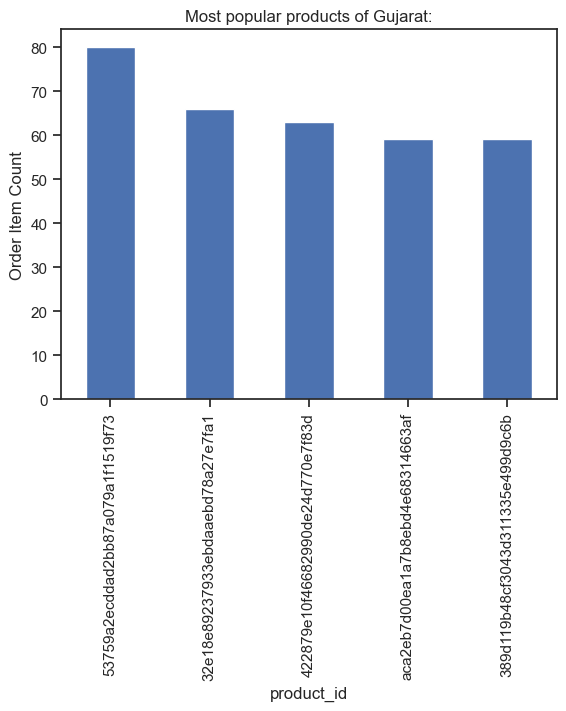

Most popular products of Arunachal Pradesh:


,geolocation_state_cust,product_id,order_item_id
24760,Arunachal Pradesh,03e1c946c0ddfc58724ff262aef08dff,78
25180,Arunachal Pradesh,7c68e7297c7df2535c9f0dcd61007f64,32
25218,Arunachal Pradesh,89b190a046022486c635022524a974a8,15
25106,Arunachal Pradesh,66b1f09e746c05761bcaccf6339bde8d,15
25108,Arunachal Pradesh,680874c570dad71c0a2844cfbf417054,12


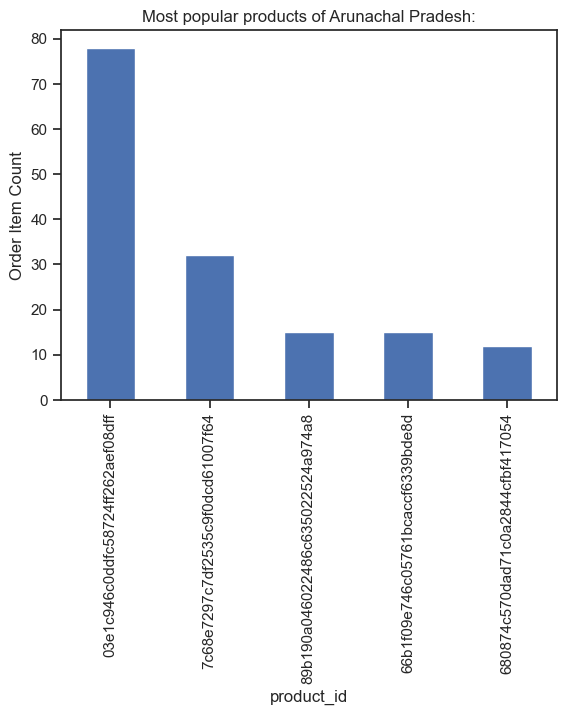

In [162]:
# Show the most popular 5 products for top 5 states
for state in top_states:
    print(f"Most popular products of {state}:")
    display(top_prod_by_states[top_prod_by_states.geolocation_state_cust == state].head(5))
    top_prod_by_states[top_prod_by_states.geolocation_state_cust == state].head(5).plot(kind='bar', x='product_id', y='order_item_id', legend=None)
    plt.xlabel('product_id')
    plt.ylabel('Order Item Count')
    plt.title(f"Most popular products of {state}:")
    plt.show()

### Top 10 products by category

In [163]:
top_prod_by_category = df.groupby(["product_category_name"])[['order_item_id']].sum().reset_index().sort_values('order_item_id', ascending = False)
df2 = top_prod_by_category.head(10)
df2.head()

,product_category_name,order_item_id
7,Bed_Bath_Table,16766
39,Furniture_Decor,12164
43,Health_Beauty,11456
65,Sports_Leisure,10330
15,Computers_Accessories,10226


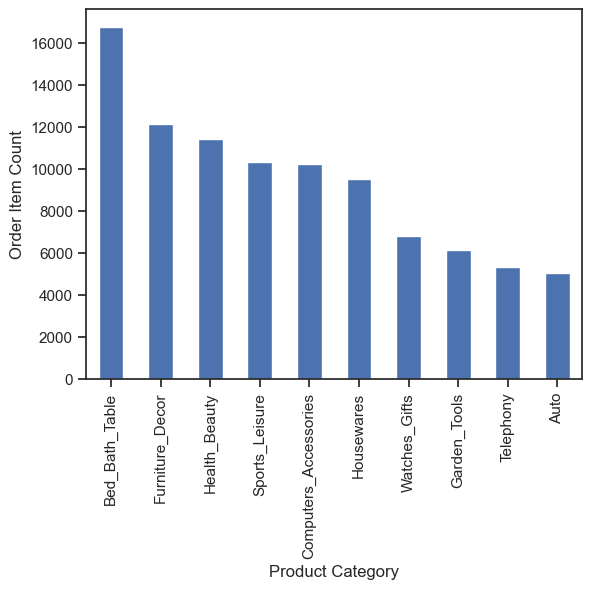

In [165]:
df2.head(10).plot(kind='bar', x='product_category_name', y='order_item_id', legend=None)
plt.xlabel('Product Category')
plt.ylabel('Order Item Count')
plt.show()


## g. Popular categories by state

In [170]:
# Group the data by state and category and calculate the total order item count
state_cat_count = df.groupby(['geolocation_state_cust', 'product_category_name'])['order_item_id'].sum().reset_index().sort_values(['geolocation_state_cust', 'order_item_id'], ascending=[True, False])
state_cat_count.head()

,geolocation_state_cust,product_category_name,order_item_id
7,Andhra Pradesh,Bed_Bath_Table,11266
39,Andhra Pradesh,Furniture_Decor,7861
43,Andhra Pradesh,Health_Beauty,7561
15,Andhra Pradesh,Computers_Accessories,6742
65,Andhra Pradesh,Sports_Leisure,6618


In [171]:
# Get the top categories in each state
top_cat_by_state = state_cat_count.groupby('geolocation_state_cust').head(1)

top_cat_by_state.head()

,geolocation_state_cust,product_category_name,order_item_id
7,Andhra Pradesh,Bed_Bath_Table,11266
100,Arunachal Pradesh,Furniture_Decor,167
131,Chhattisgarh,Bed_Bath_Table,910
198,Delhi,Bed_Bath_Table,414
254,Goa,Auto,1


In [172]:
print(top_cat_by_state[['geolocation_state_cust', 'product_category_name', 'order_item_id']])

     geolocation_state_cust product_category_name  order_item_id
7            Andhra Pradesh        Bed_Bath_Table          11266
100       Arunachal Pradesh       Furniture_Decor            167
131            Chhattisgarh        Bed_Bath_Table            910
198                   Delhi        Bed_Bath_Table            414
254                     Goa                  Auto              1
270                 Gujarat        Bed_Bath_Table           1076
337                 Haryana        Bed_Bath_Table            410
393        Himachal Pradesh        Bed_Bath_Table            101
444         Jammu & Kashmir        Bed_Bath_Table            286
500               Karnataka        Bed_Bath_Table            525
562                  Kerala        Bed_Bath_Table            173
619          Madhya Pradesh        Bed_Bath_Table            449
684             Maharashtra        Bed_Bath_Table            289
743                  Orissa        Bed_Bath_Table            102
816                  Punj

## Popular categories by month

In [173]:
df['month_year'] = df['order_purchase_timestamp'].dt.strftime("%b %Y")

In [174]:
month_cat_count = df.groupby(['month_year', 'product_category_name'])['order_item_id'].sum().reset_index().sort_values(['order_item_id'], ascending=[False])
month_cat_count

,month_year,product_category_name,order_item_id
477,Jan 2018,Bed_Bath_Table,1500
377,Feb 2018,Computers_Accessories,1471
1031,Nov 2017,Bed_Bath_Table,1422
1061,Nov 2017,Furniture_Decor,1351
844,Mar 2018,Bed_Bath_Table,1195
...,...,...,...
1104,Oct 2016,Fashion_Male_Clothing,1
1105,Oct 2016,Fashion_Shoes,1
1107,Oct 2016,Food,1
389,Feb 2018,Fashio_Female_Clothing,1


In [185]:
top_cat_by_month = month_cat_count.groupby('month_year').head(1)

top_cat_by_month

,month_year,product_category_name,order_item_id
477,Jan 2018,Bed_Bath_Table,1500
377,Feb 2018,Computers_Accessories,1471
1031,Nov 2017,Bed_Bath_Table,1422
844,Mar 2018,Bed_Bath_Table,1195
64,Apr 2018,Bed_Bath_Table,1078
969,May 2018,Bed_Bath_Table,1044
727,Jun 2018,Bed_Bath_Table,1040
227,Aug 2018,Health_Beauty,992
1127,Oct 2017,Bed_Bath_Table,987
637,Jul 2018,Health_Beauty,926


## h. List top 10 most expensive products sorted by price

In [183]:
top_10_expensive = df[['product_category_name', 'product_id', 'price']].sort_values('price', ascending = False, ignore_index = True).head(10)
top_10_expensive


,product_category_name,product_id,price
0,Housewares,489ae2aa008f021502940f251d4cce7f,6735.00
1,Computers,69c590f7ffc7bf8db97190b6cb6ed62e,6729.00
2,Art,1bdf5e6731585cf01aa8169c7028d6ad,6499.00
3,Small_Appliances,a6492cc69376c469ab6f61d8f44de961,4799.00
4,Small_Appliances,c3ed642d592594bb648ff4a04cee2747,4690.00
5,Computers,259037a6a41845e455183f89c5035f18,4590.00
6,Musical_Instruments,a1beef8f3992dbd4cd8726796aa69c53,4399.87
7,Consoles_Games,6cdf8fc1d741c76586d8b6b15e9eef30,4099.99
8,Sports_Leisure,dd113cb02b2af9c8e5787e8f1f0722f6,4059.00
9,Watches_Gifts,6902c1962dd19d540807d0ab8fade5c6,3999.90


## 2. Performing Customers/sellers Segmentation

### a. Divide the customers into groups based on the revenue generated


In [186]:
revenue_per_customer = df.groupby('customer_id')[['payment_value']].sum().reset_index()
revenue_per_customer.head()

,customer_id,payment_value
0,00012a2ce6f8dcda20d059ce98491703,114.74
1,000161a058600d5901f007fab4c27140,67.41
2,0001fd6190edaaf884bcaf3d49edf079,195.42
3,0002414f95344307404f0ace7a26f1d5,179.35
4,000379cdec625522490c315e70c7a9fb,107.01


In [187]:
df['revenue_groups_cust'] = pd.qcut(revenue_per_customer.payment_value, q=4, labels=['Low', 'Medium', 'High', 'Very High'])

In [188]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,...,geolocation_lng_cust,geolocation_city_cust,geolocation_state_cust,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller,user_type,revenue_groups_cust
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2017,10,...,-46.587471,Akkarampalle,Andhra Pradesh,9350,-23.680114,-46.452454,Chhuikhadan,Chhattisgarh,EXISTING,High
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2017,10,...,-46.587471,Akkarampalle,Andhra Pradesh,9350,-23.680114,-46.452454,Chhuikhadan,Chhattisgarh,EXISTING,Medium
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2017,10,...,-46.587471,Akkarampalle,Andhra Pradesh,9350,-23.680114,-46.452454,Chhuikhadan,Chhattisgarh,EXISTING,High
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:00,2017-08-15 20:05:00,2017-08-17 15:28:00,2017-08-18 14:44:00,2017-08-28,2017,8,...,-46.534603,Akkarampalle,Andhra Pradesh,9350,-23.680114,-46.452454,Chhuikhadan,Chhattisgarh,NEW,High
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:00,2017-08-02 18:43:00,2017-08-04 17:35:00,2017-08-07 18:30:00,2017-08-15,2017,8,...,-46.630743,Akkarampalle,Andhra Pradesh,9350,-23.680114,-46.452454,Chhuikhadan,Chhattisgarh,NEW,Medium


In [189]:
df.revenue_groups_cust.value_counts()

Medium       24548
Low          24544
Very High    24544
High         24540
Name: revenue_groups_cust, dtype: int64

## b. Divide the sellers into groups based on the revenue generated 

In [190]:
revenue_per_seller = df.groupby('seller_id')[['payment_value']].sum().reset_index()
revenue_per_seller.head()
df['revenue_groups_seller'] = pd.qcut(revenue_per_customer.payment_value, q=4, labels=['Low', 'Medium', 'High', 'Very High'])
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,...,geolocation_city_cust,geolocation_state_cust,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller,user_type,revenue_groups_cust,revenue_groups_seller
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2017,10,...,Akkarampalle,Andhra Pradesh,9350,-23.680114,-46.452454,Chhuikhadan,Chhattisgarh,EXISTING,High,High
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2017,10,...,Akkarampalle,Andhra Pradesh,9350,-23.680114,-46.452454,Chhuikhadan,Chhattisgarh,EXISTING,Medium,Medium
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2017,10,...,Akkarampalle,Andhra Pradesh,9350,-23.680114,-46.452454,Chhuikhadan,Chhattisgarh,EXISTING,High,High
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:00,2017-08-15 20:05:00,2017-08-17 15:28:00,2017-08-18 14:44:00,2017-08-28,2017,8,...,Akkarampalle,Andhra Pradesh,9350,-23.680114,-46.452454,Chhuikhadan,Chhattisgarh,NEW,High,High
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:00,2017-08-02 18:43:00,2017-08-04 17:35:00,2017-08-07 18:30:00,2017-08-15,2017,8,...,Akkarampalle,Andhra Pradesh,9350,-23.680114,-46.452454,Chhuikhadan,Chhattisgarh,NEW,Medium,Medium


In [191]:
df.revenue_groups_seller.value_counts()

Medium       24548
Low          24544
Very High    24544
High         24540
Name: revenue_groups_seller, dtype: int64

## 3. Cross-Selling (Which products are selling together)
### Hint: We need to find which of the top 10 combinations of products are selling together in each transaction. (combination of 2 or 3 buying together)


In [204]:
import itertools

# Step 1: Filter the necessary columns
df1 = df[['order_id', 'product_id']]

# Step 2: Group the data by order_id
grouped_data = df1.groupby('order_id')['product_id'].apply(list)

# Step 3: Generate all possible combinations of 2 or 3 products for each order
combinations = []
for products in grouped_data:
    if len(products) >= 2:
        combos = itertools.chain.from_iterable(
            itertools.combinations(products, r) for r in range(2, min(4, len(products) + 1)))
        combinations.extend(combos)

# Step 4: Count the frequency of each combination
combo_count = {}
for combo in combinations:
    combo = tuple(sorted(combo))
    combo_count[combo] = combo_count.get(combo, 0) + 1

# Step 5: Sort the combinations by frequency and return the top 10
top_combinations_prod_id = sorted(combo_count.items(), key=lambda x: x[1], reverse=True)[:10]


In [205]:
top_combinations_prod_id

[(('5ddab10d5e0a23acb99acf56b62b3276',
   'ebf9bc6cd600eadd681384e3116fda85',
   'ebf9bc6cd600eadd681384e3116fda85'),
  18081),
 (('ebf9bc6cd600eadd681384e3116fda85',
   'ebf9bc6cd600eadd681384e3116fda85',
   'ebf9bc6cd600eadd681384e3116fda85'),
  11480),
 (('5ddab10d5e0a23acb99acf56b62b3276',
   '5ddab10d5e0a23acb99acf56b62b3276',
   'ebf9bc6cd600eadd681384e3116fda85'),
  8820),
 (('0554911df28fda9fd668ce5ba5949695',
   '0554911df28fda9fd668ce5ba5949695',
   '0554911df28fda9fd668ce5ba5949695'),
  8436),
 (('1aecdb5fa3add74e385f25c6c527a462',
   '1aecdb5fa3add74e385f25c6c527a462',
   '1aecdb5fa3add74e385f25c6c527a462'),
  3654),
 (('8d37ee446981d3790967d0268d6cfc81',
   '8d37ee446981d3790967d0268d6cfc81',
   '8d37ee446981d3790967d0268d6cfc81'),
  2600),
 (('11250b0d4b709fee92441c5f34122aed',
   '11250b0d4b709fee92441c5f34122aed',
   '11250b0d4b709fee92441c5f34122aed'),
  2024),
 (('eea3e07f864a0a1389726d8a5f31c3f6',
   'eea3e07f864a0a1389726d8a5f31c3f6',
   'eea3e07f864a0a1389726d8a5f3

In [206]:
import itertools

# Step 1: Filter the necessary columns
df2 = df[['order_id', 'product_category_name']]

# Step 2: Group the data by order_id
grouped_data = df2.groupby('order_id')['product_category_name'].apply(list)

# Step 3: Generate all possible combinations of 2 or 3 products for each order
combinations = []
for products in grouped_data:
    if len(products) >= 2:
        combos = itertools.chain.from_iterable(
            itertools.combinations(products, r) for r in range(2, min(4, len(products) + 1)))
        combinations.extend(combos)

# Step 4: Count the frequency of each combination
combo_count = {}
for combo in combinations:
    combo = tuple(sorted(combo))
    combo_count[combo] = combo_count.get(combo, 0) + 1

# Step 5: Sort the combinations by frequency and return the top 10
top_combinations_prod_cat = sorted(combo_count.items(), key=lambda x: x[1], reverse=True)[:10]


In [207]:
top_combinations_prod_cat

[(('Bed_Bath_Table', 'Bed_Bath_Table', 'Bed_Bath_Table'), 22912),
 (('Bed_Bath_Table', 'Bed_Bath_Table', 'Housewares'), 18186),
 (('Office_Furniture', 'Office_Furniture', 'Office_Furniture'), 9615),
 (('Bed_Bath_Table', 'Housewares', 'Housewares'), 8944),
 (('Garden_Tools', 'Garden_Tools', 'Garden_Tools'), 7912),
 (('Bed_Bath_Table', 'Bed_Bath_Table'), 6431),
 (('Furniture_Decor', 'Furniture_Decor', 'Furniture_Decor'), 5427),
 (('Housewares', 'Housewares', 'Housewares'), 5117),
 (('Computers_Accessories', 'Computers_Accessories', 'Computers_Accessories'),
  4912),
 (('Furniture_Decor', 'Furniture_Decor'), 4523)]

## 4. Payment Behaviour
### a. How customers are paying?


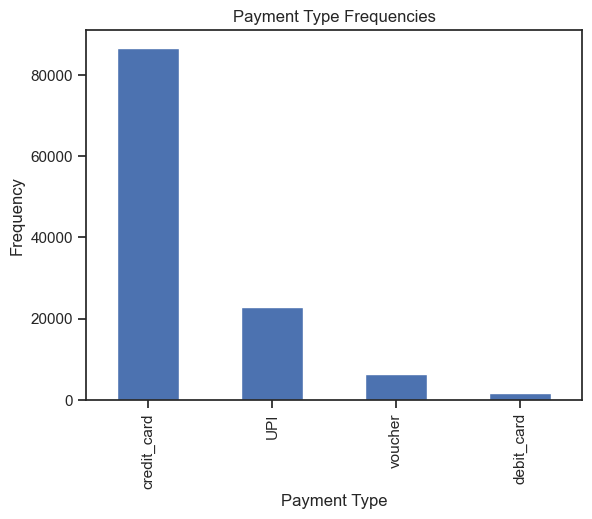

In [208]:
df.payment_type.value_counts().plot(kind = 'bar')
plt.xlabel('Payment Type')
plt.ylabel('Frequency')
plt.title('Payment Type Frequencies')
plt.show()

### b. Which payment channels are used by most customers?

In [209]:
payment_channels = round((df['payment_type'].value_counts( normalize= True) *100), 1)
print(payment_channels)

credit_card    73.7
UPI            19.5
voucher         5.4
debit_card      1.4
Name: payment_type, dtype: float64


### 73.7 % of the total payments are done through 'Credit Card' .

## 5. Customer satisfaction towards category & product
### a. Which categories (top 10) are maximum rated & minimum rated?


In [210]:
category_ratings = df.groupby('product_category_name')['review_score'].mean().reset_index()


top_rated_categories = category_ratings.sort_values('review_score', ascending = False).head(10)


bottom_rated_categories = category_ratings.sort_values('review_score', ascending = True).head(10)

In [211]:
print("Top 10 rated categories:")
print(top_rated_categories)

print("Bottom 10 rated categories:")
print(bottom_rated_categories)

Top 10 rated categories:
                    product_category_name  review_score
11                      Cds_Dvds_Musicals      4.642857
29              Fashion_Childrens_Clothes      4.500000
8                  Books_General_Interest      4.430851
9                          Books_Imported      4.419355
10                        Books_Technical      4.345588
22                Costruction_Tools_Tools      4.333333
64  Small_Appliances_Home_Oven_And_Coffee      4.320513
37                             Food_Drink      4.312715
53                    Luggage_Accessories      4.289905
13                             Cine_Photo      4.216216
Bottom 10 rated categories:
                product_category_name  review_score
61              Security_And_Services      2.500000
23                Diapers_And_Hygiene      3.256410
46                     Home_Comfort_2      3.387097
57                   Office_Furniture      3.516274
30              Fashion_Male_Clothing      3.531034
34                 

### b. Which products (top10) are maximum rated & minimum rated?


In [212]:
product_ratings = df.groupby(['product_id', 'product_category_name'])['review_score'].mean().reset_index()


top_rated_products = product_ratings.sort_values('review_score', ascending = False).head(10)


bottom_rated_products = product_ratings.sort_values('review_score', ascending = True).head(10)

In [213]:
print("Top 10 rated products:")
print(top_rated_products)

print("\nBottom 10 rated products:")
print(bottom_rated_products)

Top 10 rated products:
                             product_id    product_category_name  review_score
0      00066f42aeeb9f3007548bb9d3f33c38                Perfumery           5.0
11549  594bbf3064869810a9f56dac8c05acfb                     Toys           5.0
11531  5928c970e675d6fdf39abc0dfc431ee9                Telephony           5.0
11533  5929e483b6df44414c047cac38873fe6           Sports_Leisure           5.0
25799  c8f3af40bfb84b26b7d88c30a0760b27                Telephony           5.0
25798  c8f17c4ceaa05acfb30a852b8ee2c0a9    Computers_Accessories           5.0
25796  c8eca123751676bbdaaa9e4a84721362  Costruction_Tools_Tools           5.0
25795  c8eb5b2d7173db25ec9bfc54dcb4ccbb                     Baby           5.0
19368  97478538ef6ed323f4ed85e2139d4a24           Bed_Bath_Table           5.0
25792  c8e902a9fd219512cc3fc5353a829e8a      Luggage_Accessories           5.0

Bottom 10 rated products:
                             product_id  product_category_name  review_score
1642

## c. Average rating by location

In [214]:
df.groupby("geolocation_state_cust")[['review_score']].mean().reset_index().sort_values("review_score", ascending = False, ignore_index = True)

,geolocation_state_cust,review_score
0,Goa,4.777778
1,Punjab,4.161290
2,Rajasthan,4.131455
3,Haryana,4.125701
4,Uttar Pradesh,4.123967
5,Tamil Nadu,4.115622
6,Orissa,4.088235
7,Maharashtra,4.080413
8,Kerala,4.060827
9,Gujarat,4.047021


## Average rating by seller

In [215]:
df.groupby("seller_id")[['review_score']].mean().reset_index().sort_values("review_score", ascending = False, ignore_index = True)

,seller_id,review_score
0,c18309219e789960add0b2255ca4b091,5.0
1,9b76ad3d04236f76bc71c59470305e13,5.0
2,ede2977fbaf3738583170735ca403f6c,5.0
3,edd066cd02126d7800f9b66e980e9931,5.0
4,9d213f303afae4983637247556438ede,5.0
...,...,...
3083,f5403d3f50089112c4eed37928b7f622,1.0
3084,749e7cdabbaf72f16677859e27874ba5,1.0
3085,dadc51ef321949ec9a3ab25cd902e23d,1.0
3086,77dcbb67ccb3659bd58eaf5661560a30,1.0


## Average rating by product

In [216]:
df.groupby("product_id")[['review_score']].mean().reset_index().sort_values("review_score", ascending = False, ignore_index = True)

,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
1,594bbf3064869810a9f56dac8c05acfb,5.0
2,5928c970e675d6fdf39abc0dfc431ee9,5.0
3,5929e483b6df44414c047cac38873fe6,5.0
4,c8f3af40bfb84b26b7d88c30a0760b27,5.0
...,...,...
32837,ca165220cdeb3367ea870193baf4a7cd,1.0
32838,ee8138bcca833152a19543702228ee26,1.0
32839,56f96b94cbba67352e072d40e4e02167,1.0
32840,1bdf131c83d68a290b1abe6b43f3c324,1.0


## Average rating by category

In [217]:
df.groupby("product_category_name")[['review_score']].mean().reset_index().sort_values("review_score", ascending = False, ignore_index = True)

,product_category_name,review_score
0,Cds_Dvds_Musicals,4.642857
1,Fashion_Childrens_Clothes,4.500000
2,Books_General_Interest,4.430851
3,Books_Imported,4.419355
4,Books_Technical,4.345588
...,...,...
66,Fashion_Male_Clothing,3.531034
67,Office_Furniture,3.516274
68,Home_Comfort_2,3.387097
69,Diapers_And_Hygiene,3.256410


## Average rating by month 

In [218]:
df.groupby("month_year")[['review_score']].mean().reset_index().sort_values("review_score", ascending = False, ignore_index = True)

,month_year,review_score
0,Dec 2016,5.000000
1,Jul 2018,4.210203
2,Aug 2018,4.206484
3,Aug 2017,4.204200
4,Jun 2018,4.175041
5,Sep 2017,4.124437
6,May 2018,4.120879
7,Jun 2017,4.116500
8,May 2017,4.115985
9,Jul 2017,4.108025


## Univariate Analysis:frequency of orders Vs Number of Customers

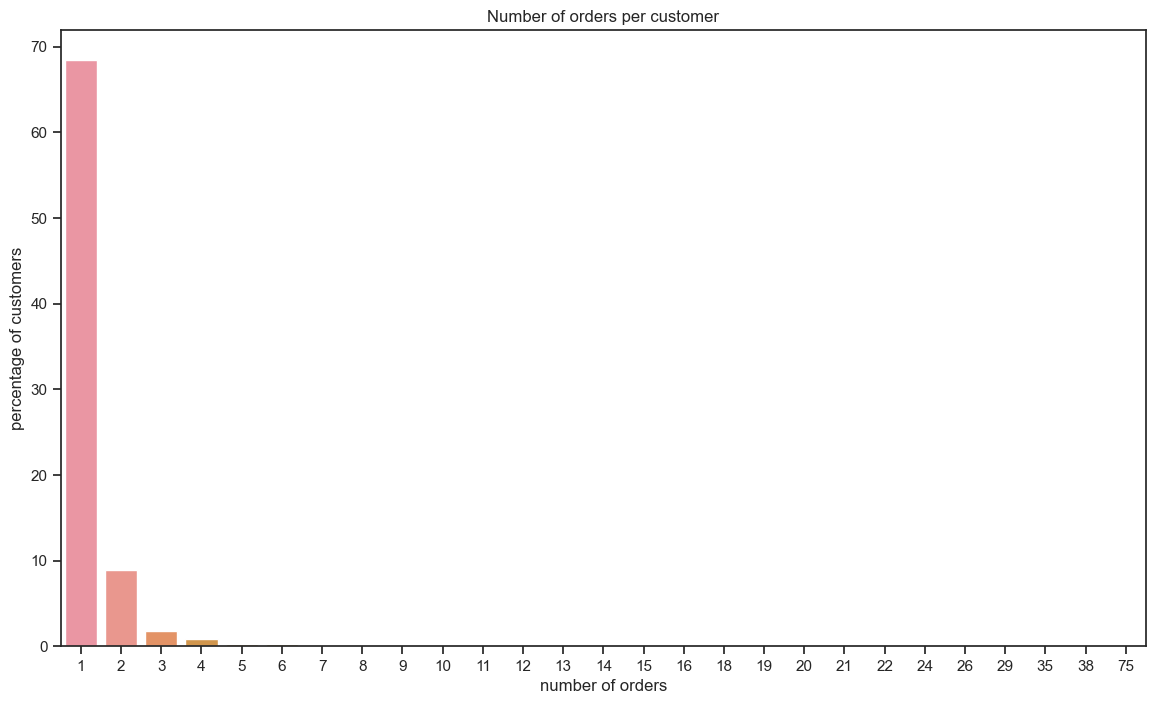

In [219]:
plt.figure(figsize=(14,8))

#counting the consumers and converting it into percentage to visualize the distribution properly
num_orders=df['customer_unique_id'].value_counts().value_counts()/df.shape[0]*100
num_orders=num_orders.reset_index()
#renaming the columns
num_orders.rename(columns={'index':'number of orders', 'customer_unique_id':'percentage of customers'},inplace=True)

#plotting bar plot
sns.barplot(data=num_orders,x='number of orders',y='percentage of customers')
plt.title('Number of orders per customer')
plt.show()

## Univariate Analysis: Order_status

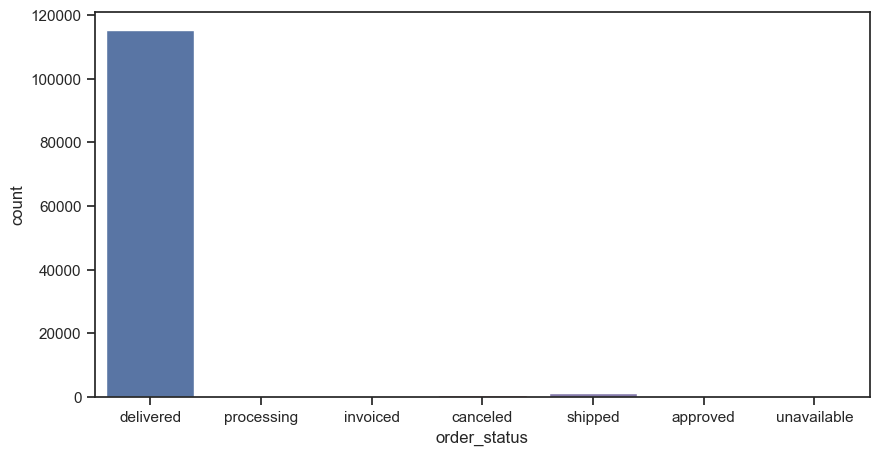

In [220]:
plt.figure(figsize = (10,5))
sns.countplot(x = df.order_status, data = df)
plt.show()

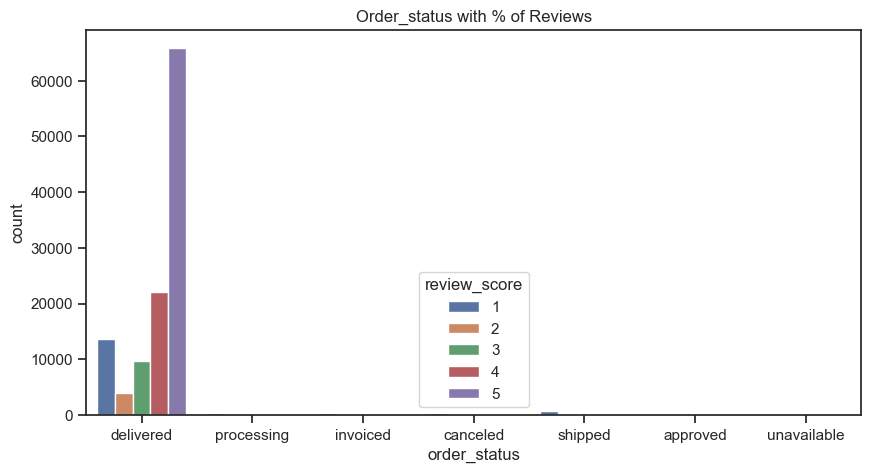

In [221]:
plt.figure(figsize = (10,5))
sns.countplot(x = df.order_status, data = df, hue = 'review_score')
plt.title('Order_status with % of Reviews')
plt.show()

In [222]:
#checking unique ids
print("Total number of unique seller_id:",len((df.seller_id).unique()))
print("Total number of unique product_id:",len((df.product_id).unique()))
print("Total number of unique customer_id:",len((df.customer_unique_id).unique()))

Total number of unique seller_id: 3088
Total number of unique product_id: 32842
Total number of unique customer_id: 94953


## Total Number of orders based vs Total delivery Time (Days)

In [223]:
df['day_to_delivery']=((df['order_delivered_customer_date']-df['order_purchase_timestamp']).dt.days)

In [224]:
print("The min time of delivery in days is - ", df.day_to_delivery.min(), "days")
print("The max time of delivery in days is - ", df.day_to_delivery.max(), "days")
print("The mean time of delivery in days is - ", df.day_to_delivery.mean(), "days")

The min time of delivery in days is -  0 days
The max time of delivery in days is -  209 days
The mean time of delivery in days is -  12.290706168141742 days


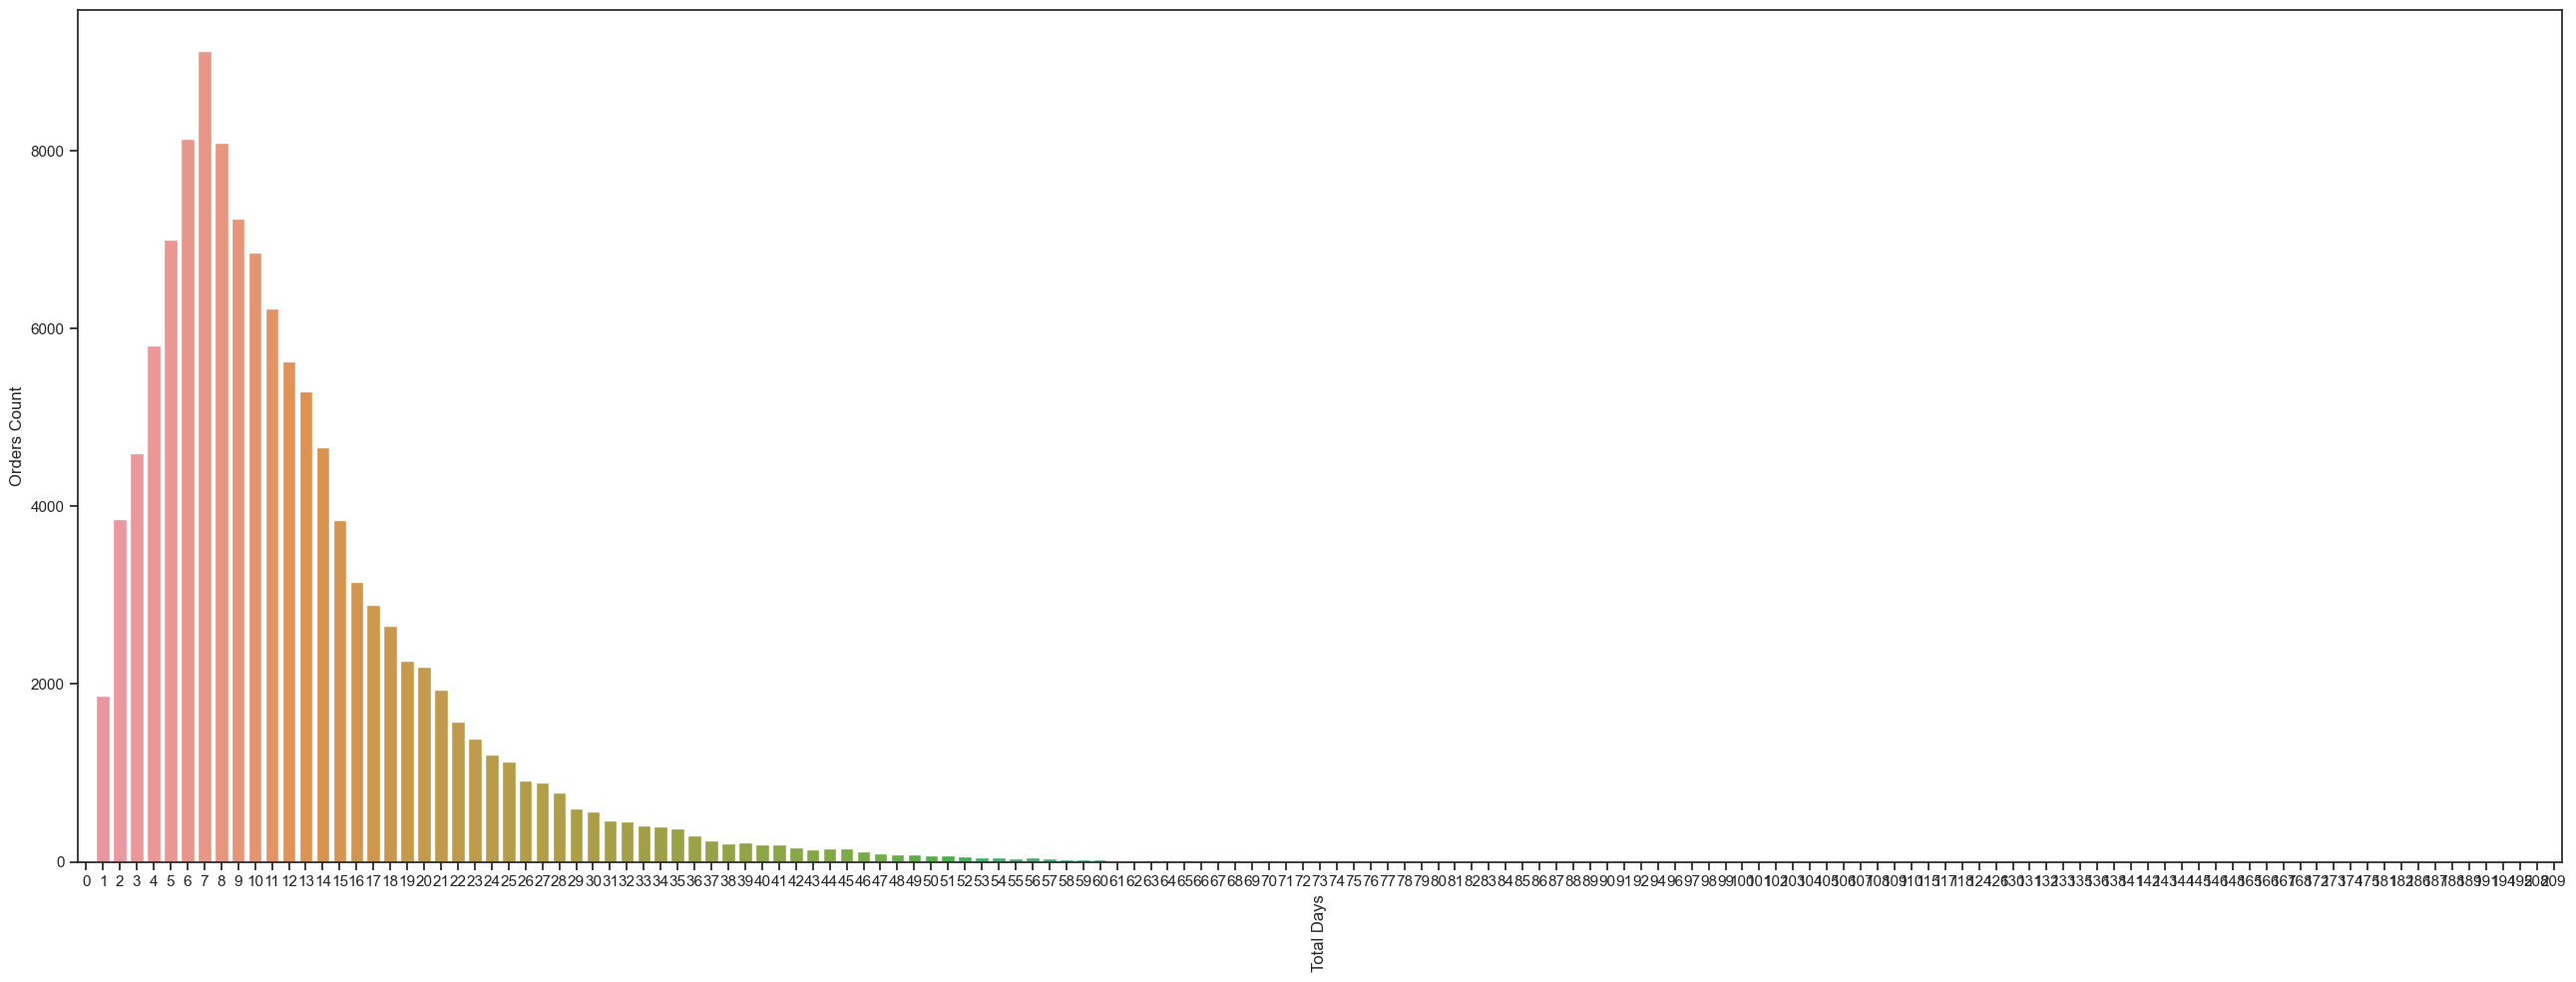

In [225]:
plt.figure(figsize=(26,10))
sns.countplot(x = df.day_to_delivery, data = df)
plt.xlabel('Total Days', rotation = 90)
plt.ylabel('Orders Count')
plt.tight_layout()
plt.show()

### Observation(s):

#### It can be observed that the maximum number of orders are delivered in 7 days and few orders are also delivered in more than 30 days.

## Univariate Analysis on Numerical Features
### Price

In [226]:
print("The min price of product is - ", df.price.min(), "INR")
print("The max price of product is - ", df.price.max(), "INR")
print("The mean price of product is - ", df.price.mean(), "INR")

The min price of product is -  0.85 INR
The max price of product is -  6735.0 INR
The mean price of product is -  120.68350017848095 INR


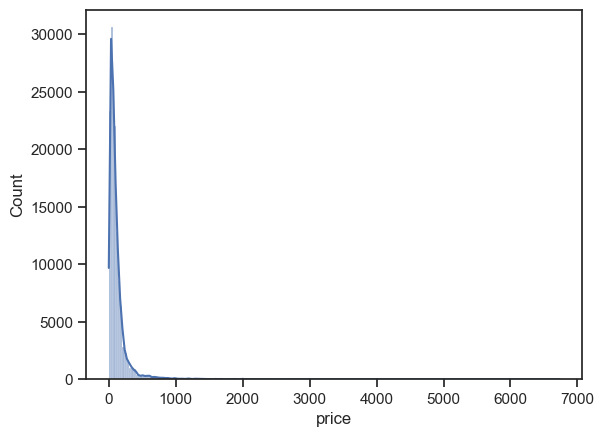

In [227]:
sns.histplot(x = df.price, data = df, bins = 200, kde = True)
plt.show()

### freight_value

In [228]:
print("The min freight_value of product is - ", df.freight_value.min(), "INR")
print("The max freight_value of product is - ", df.freight_value.max(), "INR")
print("The mean freight_value of product is - ", df.freight_value.mean(), "INR")

The min freight_value of product is -  0.0 INR
The max freight_value of product is -  409.68 INR
The mean freight_value of product is -  20.025874853484794 INR


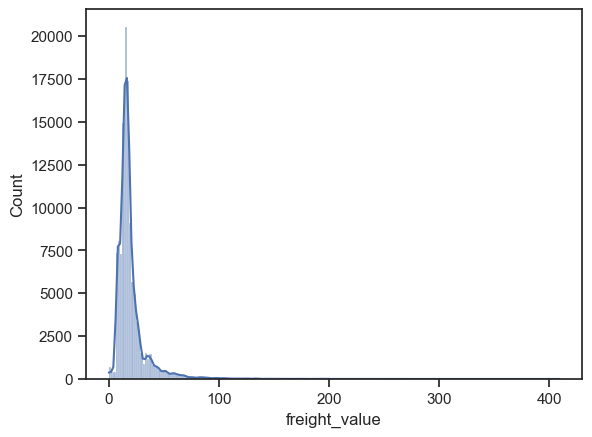

In [229]:
sns.histplot(x = df.freight_value, data = df, bins = 200, kde = True)
plt.show()

### Boxplot of product height, width, length and weight

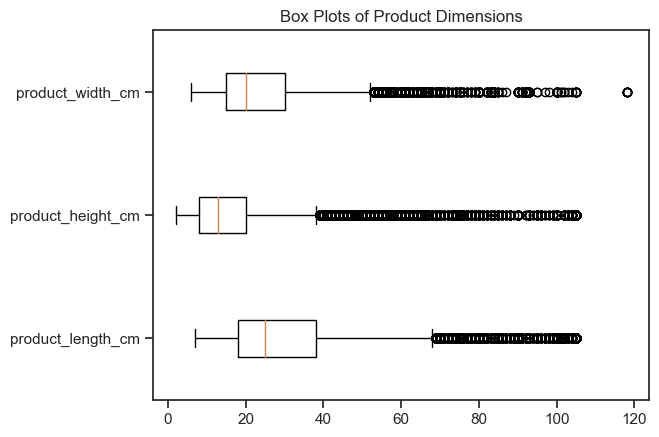

In [230]:
box_plot_data=[df.product_length_cm,df.product_height_cm,df.product_width_cm]
plt.boxplot(box_plot_data,labels=['product_length_cm','product_height_cm','product_width_cm'],vert=False)
plt.title("Box Plots of Product Dimensions")
plt.show()

## Bivariate analysis
### price vs freight_value

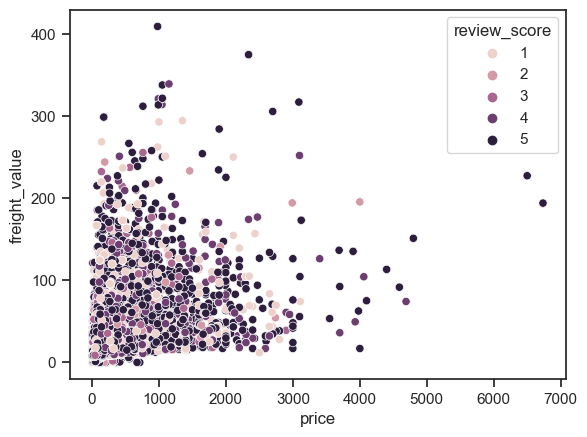

In [231]:
sns.scatterplot(x='price',y='freight_value', data = df, hue = 'review_score')
plt.show()

### product weight vs freight_value

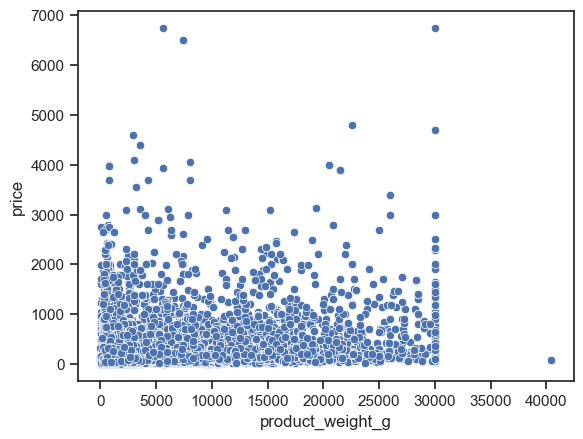

In [232]:
sns.scatterplot(y='price',x='product_weight_g', data = df)
plt.show()

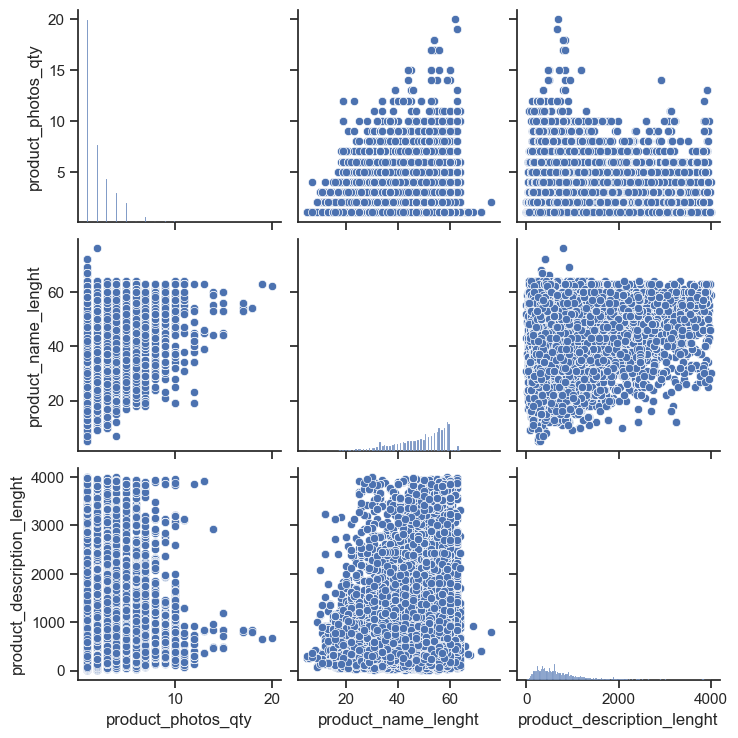

In [233]:
sns.pairplot(df[['product_photos_qty','product_name_lenght','product_description_lenght']])
plt.show()

### It is very hard to say anything about these plot as data-points are not seperable and it is completely mixed data.